In [1]:
a = 'Hello, heatwaves!'

print(a)

Hello, heatwaves!


## Предобработка

1) импорт данных

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Чтение данных
ekb = pd.read_csv('ekaterinburg_PET.csv', sep = ";", decimal=",")
krasnodar = pd.read_csv('krasnodar_PET.csv', sep = ";", decimal=",")
moscow = pd.read_csv('moscow_PET.csv', sep = ";", decimal=",")
spb = pd.read_csv('spb_PET.csv', sep = ";", decimal=",")
novosibirsk = pd.read_csv('novosibirsk_PET.csv', sep = ";", decimal=",")
vladivostok = pd.read_csv('vladivostok_PET.csv', sep = ";", decimal=",")

# Создадим новую колонку с названием города и избавимся от лишных колонок
ekb["City"] = "Екатеринбург"
ekb = ekb[['City', 'Date_2', 'PET']]

krasnodar["City"] = "Краснодар"
krasnodar = krasnodar[['City', 'Date_2', 'PET']]

moscow["City"] = "Москва"
moscow = moscow[['City', 'Date_2', 'PET']]

spb["City"] = "Санкт-Перербург"
spb = spb[['City', 'Date_2', 'PET']]

novosibirsk["City"] = "Новосибирск"
novosibirsk = novosibirsk[['City', 'Date_2', 'PET']]

vladivostok["City"] = "Владивосток"
vladivostok = vladivostok[['City', 'Date_2', 'PET']]


# объединим таблицы
all_cities = pd.concat([ekb, krasnodar, moscow, spb, novosibirsk, vladivostok])

# Поправим тип данных для колонки с датами и сохраним в новую колонку,
# а старую удалим
all_cities["Date"] = pd.to_datetime(all_cities["Date_2"])
all_cities = all_cities[['City', 'Date', 'PET']]

# Добавим еще одну колонку, куда запишем просто год
all_cities['Year'] = pd.DatetimeIndex(all_cities['Date']).year

# Удалим дубликаты
all_cities = all_cities.drop_duplicates(keep='first')
all_cities.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36720 entries, 0 to 6256
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   City    36720 non-null  object        
 1   Date    36720 non-null  datetime64[ns]
 2   PET     36720 non-null  float64       
 3   Year    36720 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 1.4+ MB


/var/folders/7_/h2xhyhcd4c39tz62r5nh23r40000gn/T/ipykernel_42220/1573000520.py:37: UserWarning: Parsing '13.05.1979' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  all_cities["Date"] = pd.to_datetime(all_cities["Date_2"])
/var/folders/7_/h2xhyhcd4c39tz62r5nh23r40000gn/T/ipykernel_42220/1573000520.py:37: UserWarning: Parsing '14.05.1979' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  all_cities["Date"] = pd.to_datetime(all_cities["Date_2"])
/var/folders/7_/h2xhyhcd4c39tz62r5nh23r40000gn/T/ipykernel_42220/1573000520.py:37: UserWarning: Parsing '15.05.1979' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  all_cities["Date"] = pd.to_datetime(all_cities["Date_2"])
/var/folders/7_/h2xhyhcd4c39tz62r5nh23r40000gn/T/ipykernel_42220/1573000520.py:37: UserWarning: Parsing '16.05.1979' in DD/MM/YYYY format. Provide format or specify infer_d

2) проверить данные на выбросы, для этого можно построить простые гистограммы всех значений для каждого города

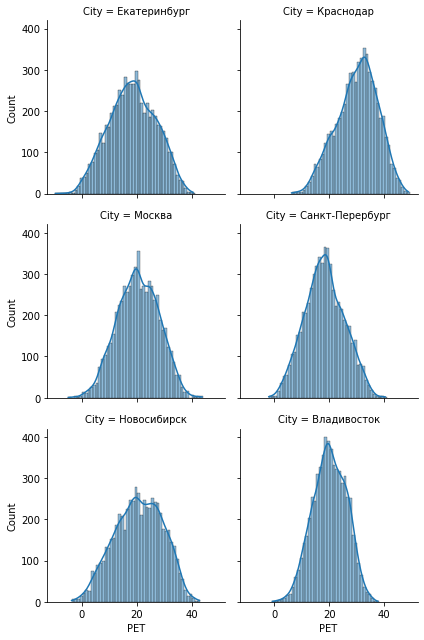

In [3]:
import seaborn as sns

g = sns.FacetGrid(all_cities,
                  col='City',                # facet col variable
                  col_wrap=2,                # define nbr of subplots per row
                  sharex=True, sharey=True   # Define which axes are shared
                 )
g.map(sns.histplot, 'PET', kde=True,
      binwidth=1                             # Width of each bin
     )


3) разметить данные, категоризовав асолютные значения по уровням термического стресса / по порогу термического стресса

In [4]:
bins =  [-10, 4, 8, 13, 18, 23, 29, 35, 41, 100]
labels = ['extreme cold stress', 'strong cold stress', 'moderate cold stress',
          'slight cold stress', 'no thermal stress', 'slight heat stress',
          'moderate heat stress', 'strong heat stress', 'extreme heat stress']
all_cities['Thermal_stress'] = pd.cut(all_cities['PET'], bins = bins, labels = labels)
all_cities.head()

,City,Date,PET,Year,Thermal_stress
0,Екатеринбург,1979-01-05,18.500000,1979,no thermal stress
1,Екатеринбург,1979-02-05,25.900000,1979,slight heat stress
2,Екатеринбург,1979-03-05,27.500000,1979,slight heat stress
3,Екатеринбург,1979-04-05,21.700001,1979,no thermal stress
4,Екатеринбург,1979-05-05,17.100000,1979,slight cold stress


4) рассчитаем количество значений каждой категории термического стресса для каждого года и каждого города и сохраним в новый датафрейм

In [5]:
all_cities_by_year = all_cities.groupby(['City', 'Year', 'Thermal_stress'], as_index=False).size()
all_cities_by_year

,City,Year,Thermal_stress,size
0,Владивосток,1979,extreme cold stress,0
1,Владивосток,1979,strong cold stress,4
2,Владивосток,1979,moderate cold stress,11
3,Владивосток,1979,slight cold stress,32
4,Владивосток,1979,no thermal stress,52
...,...,...,...,...
2155,Санкт-Перербург,2018,no thermal stress,43
2156,Санкт-Перербург,2018,slight heat stress,37
2157,Санкт-Перербург,2018,moderate heat stress,21
2158,Санкт-Перербург,2018,strong heat stress,1


In [6]:
#запишем новую таблицу в отдельный файл
all_cities_by_year.to_csv('all_cities_by_year.csv')
all_cities_by_year.iloc[[1450]]


,City,Year,Thermal_stress,size
1450,Новосибирск,1980,strong cold stress,3


In [7]:
for city in all_cities_by_year['City'].unique():
    print(city)

Владивосток
Екатеринбург
Краснодар
Москва
Новосибирск
Санкт-Перербург


## Number of days with strong stress per year

In [8]:
def plot_heatwave_data(
        data: pd.DataFrame, city: str, stress_type: str
        ) -> None:
    """Plot the number of days with a given thermal stress type for a given city.

    Args:
        data (pd.DataFrame): The data to plot.
        city (str): The city to plot.
        stress_type (str): The thermal stress type to plot.
    """    

    _, ax = plt.subplots(figsize=(8, 5), dpi=300)
    
    # A query to filter the data
    city_data = data.query(
        'City == @city & Thermal_stress == @stress_type'
        )

    # A bar plot
    sns.barplot(x='Year', y='size', data=city_data, ax=ax)
    ax.set_title(city)
    # Rotate the x-axis labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    
    # Set the axis labels
    ax.set_ylabel(stress_type + ', days')
    ax.set_xlabel('Year')

    plt.show()

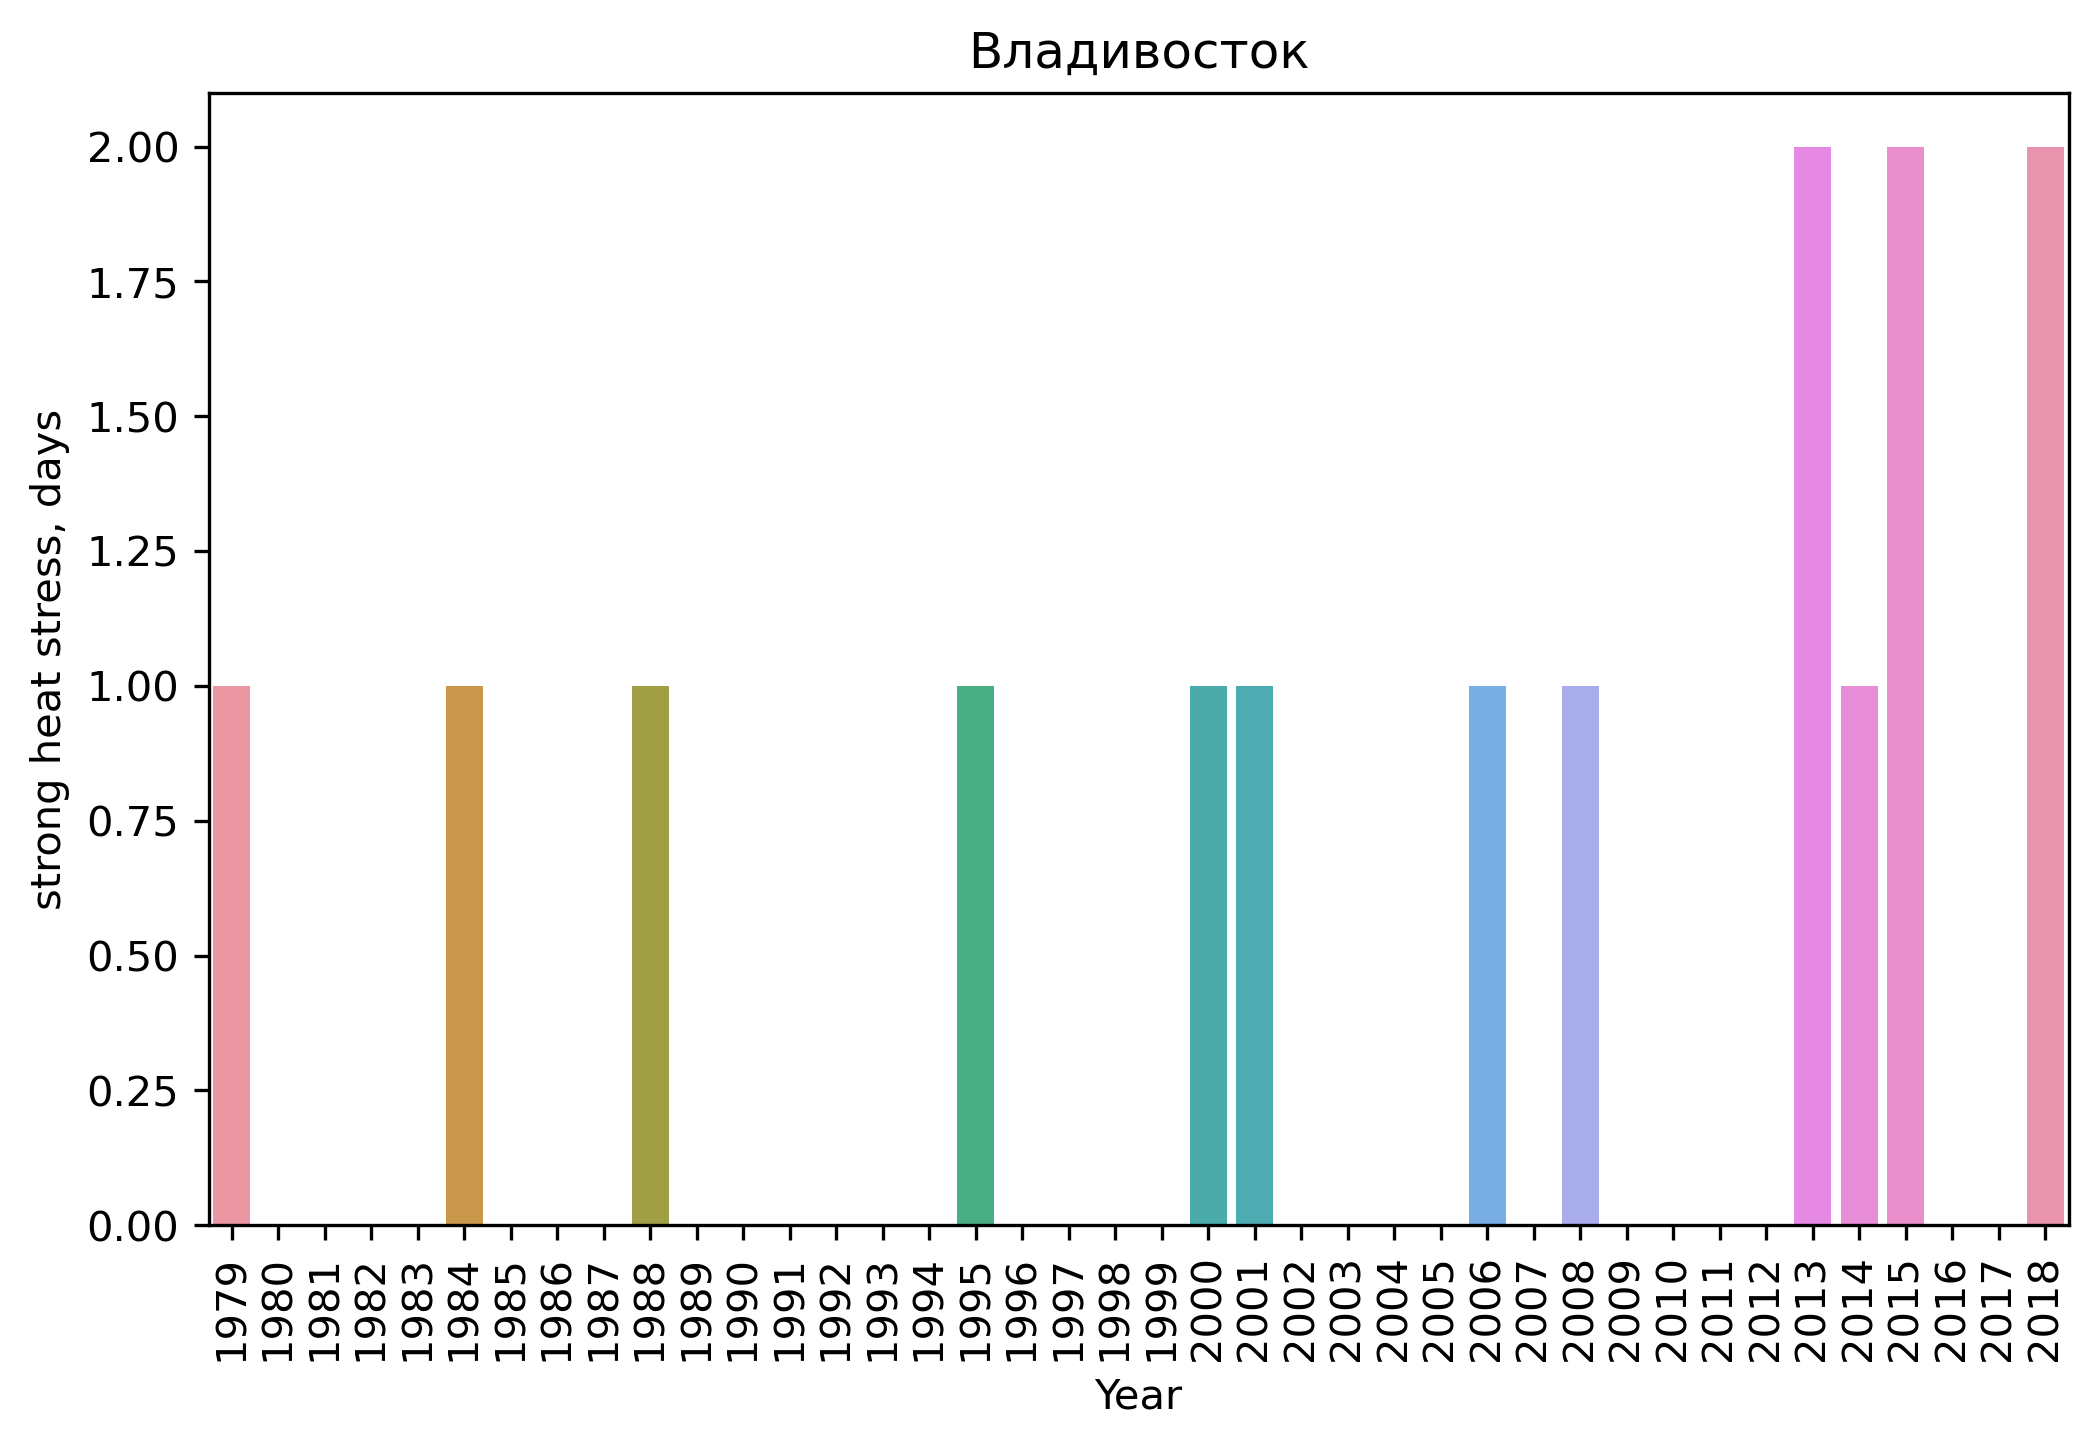

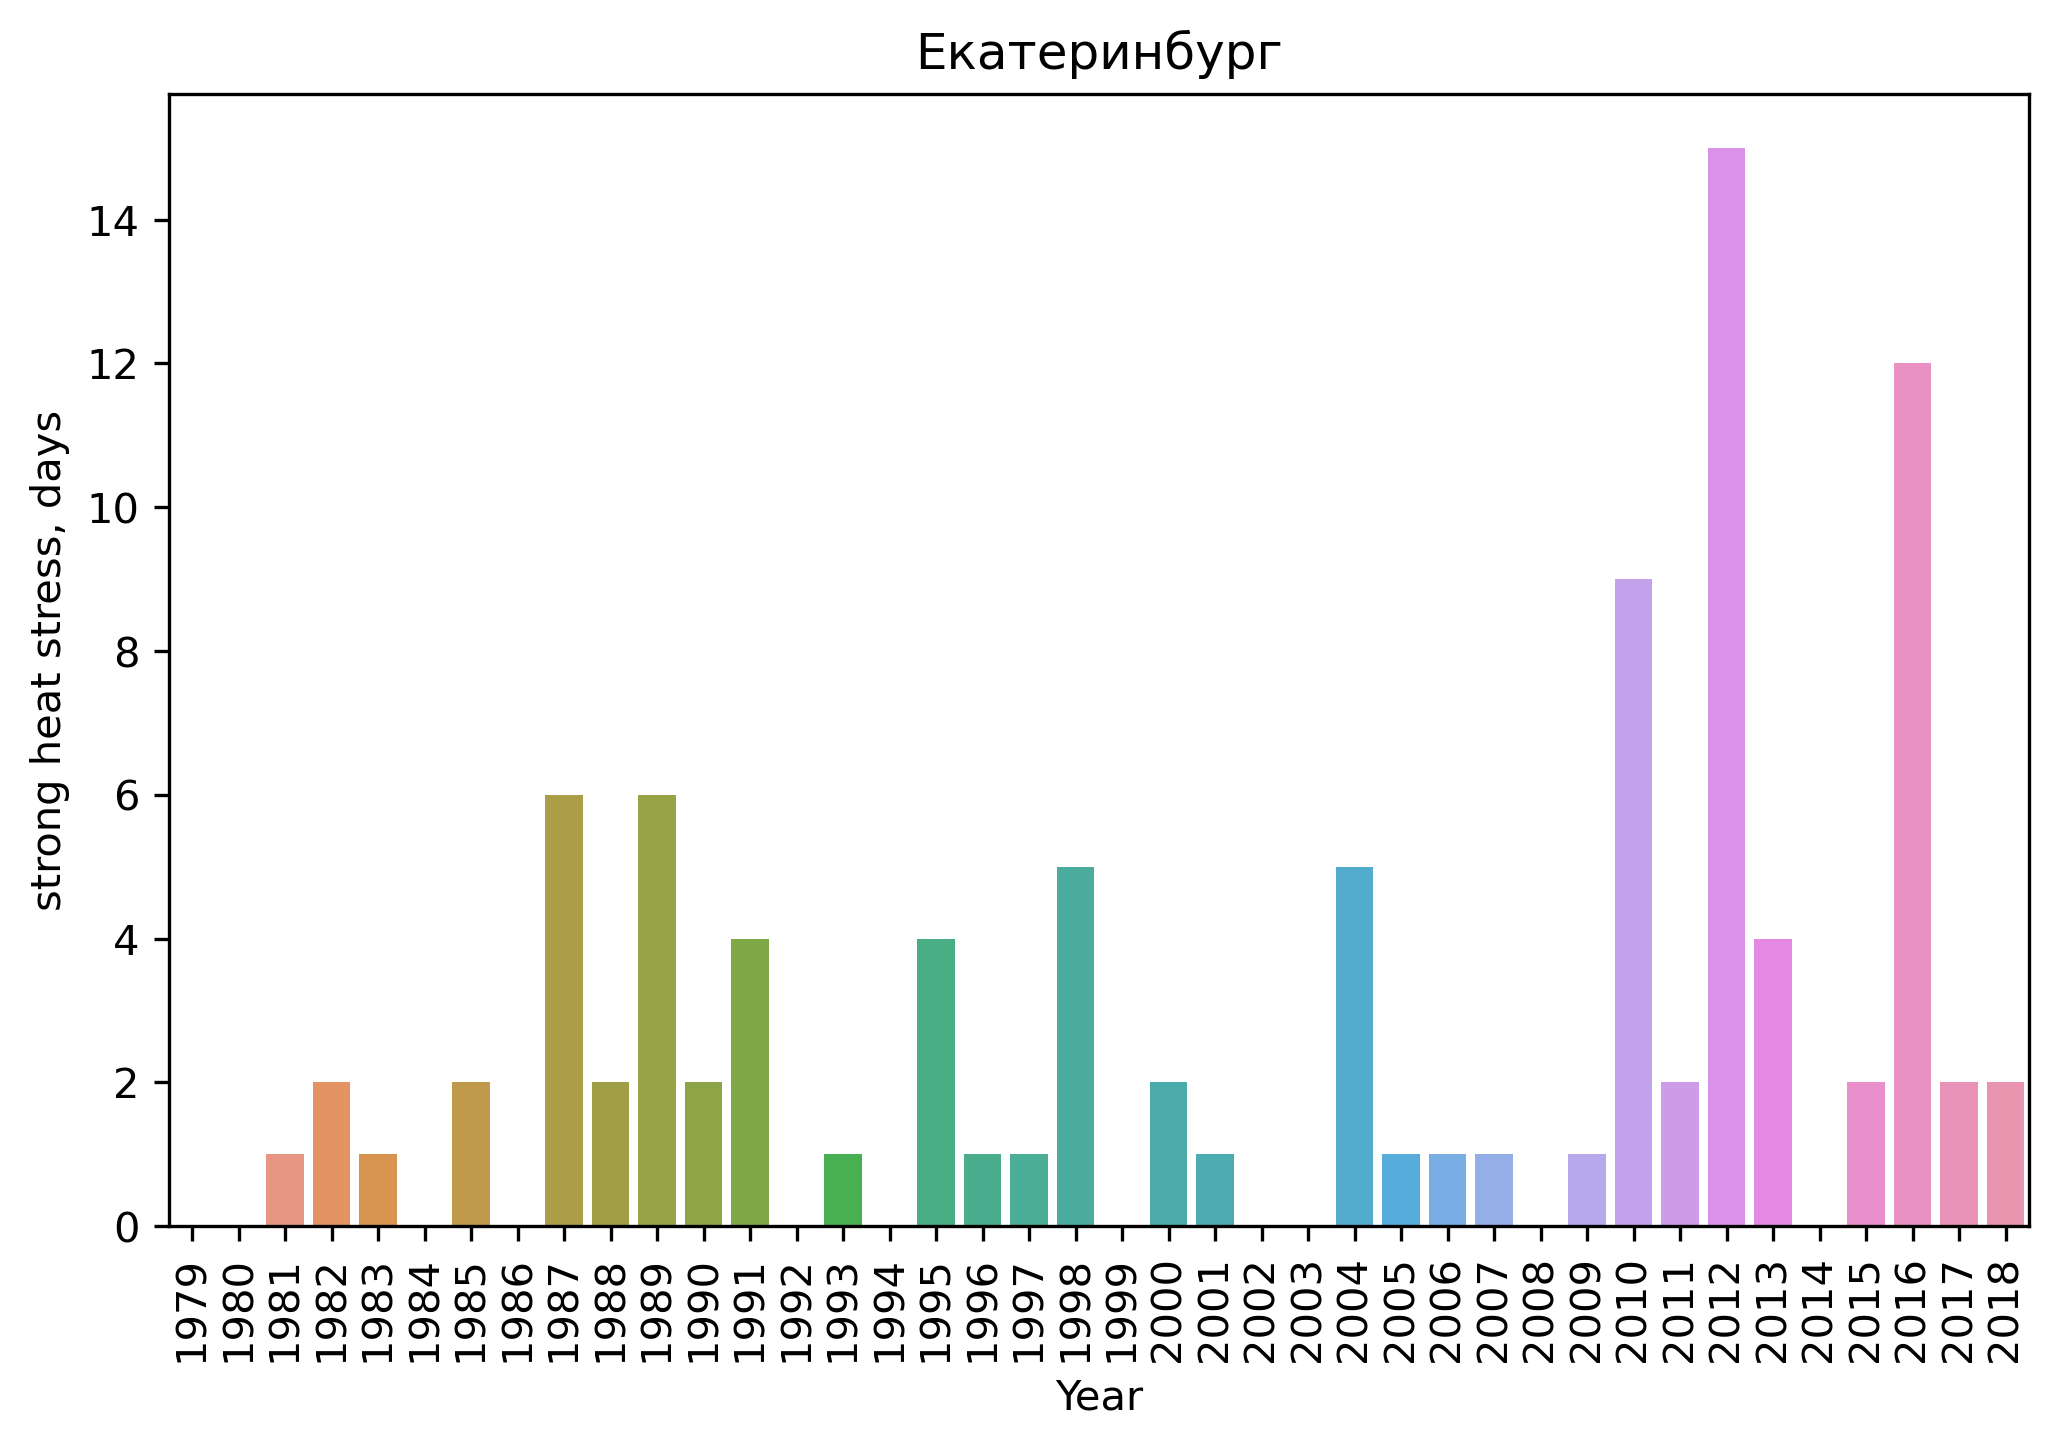

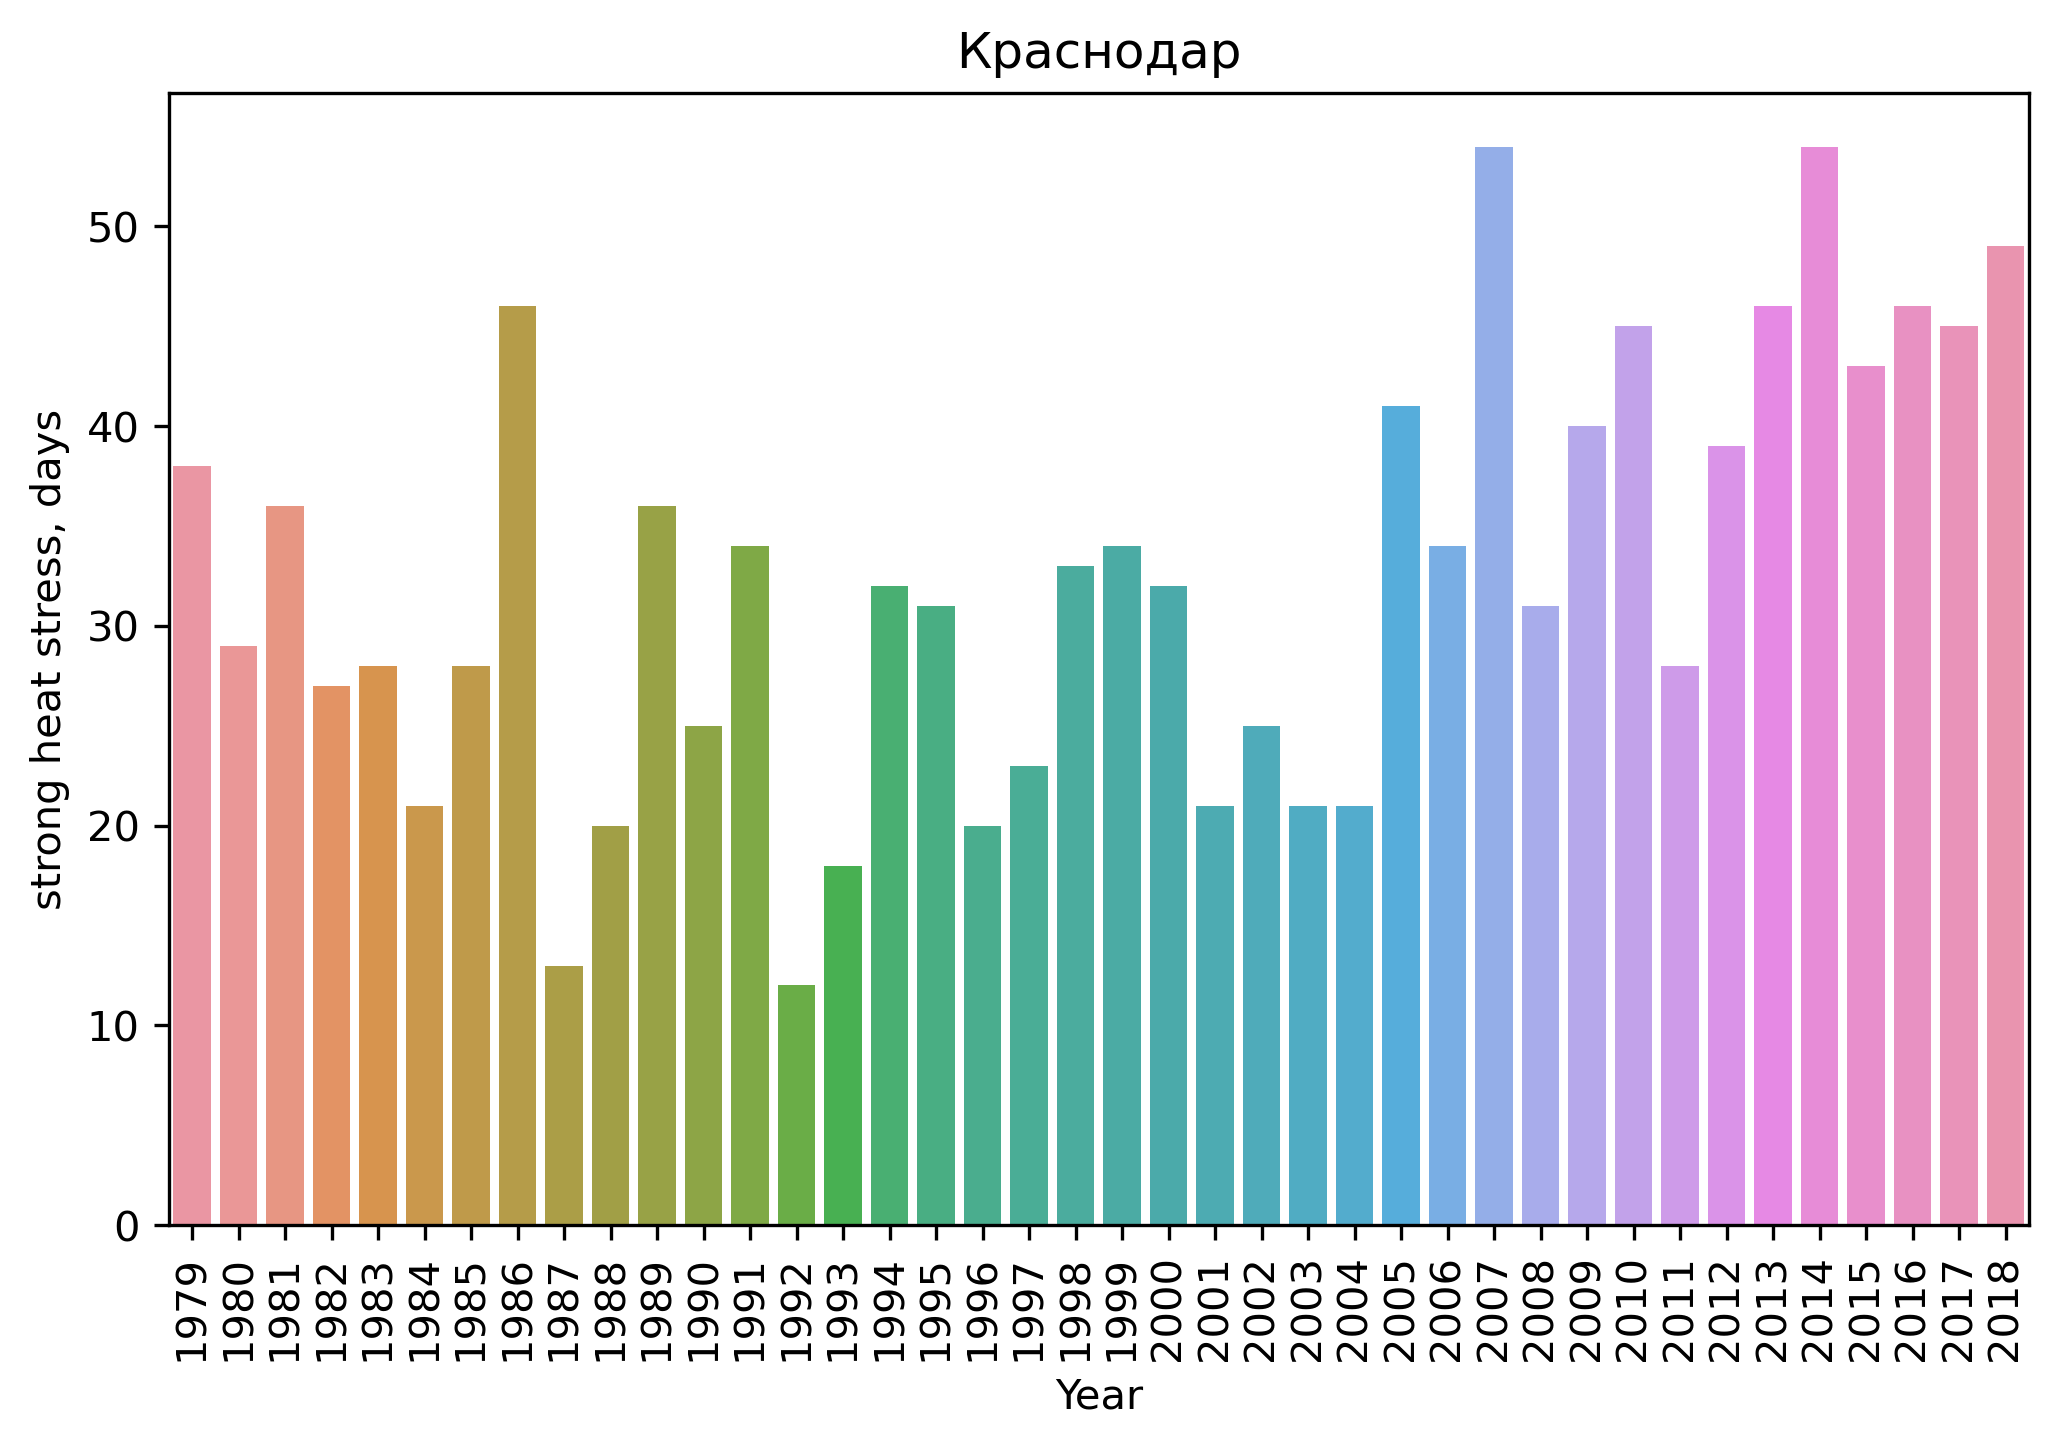

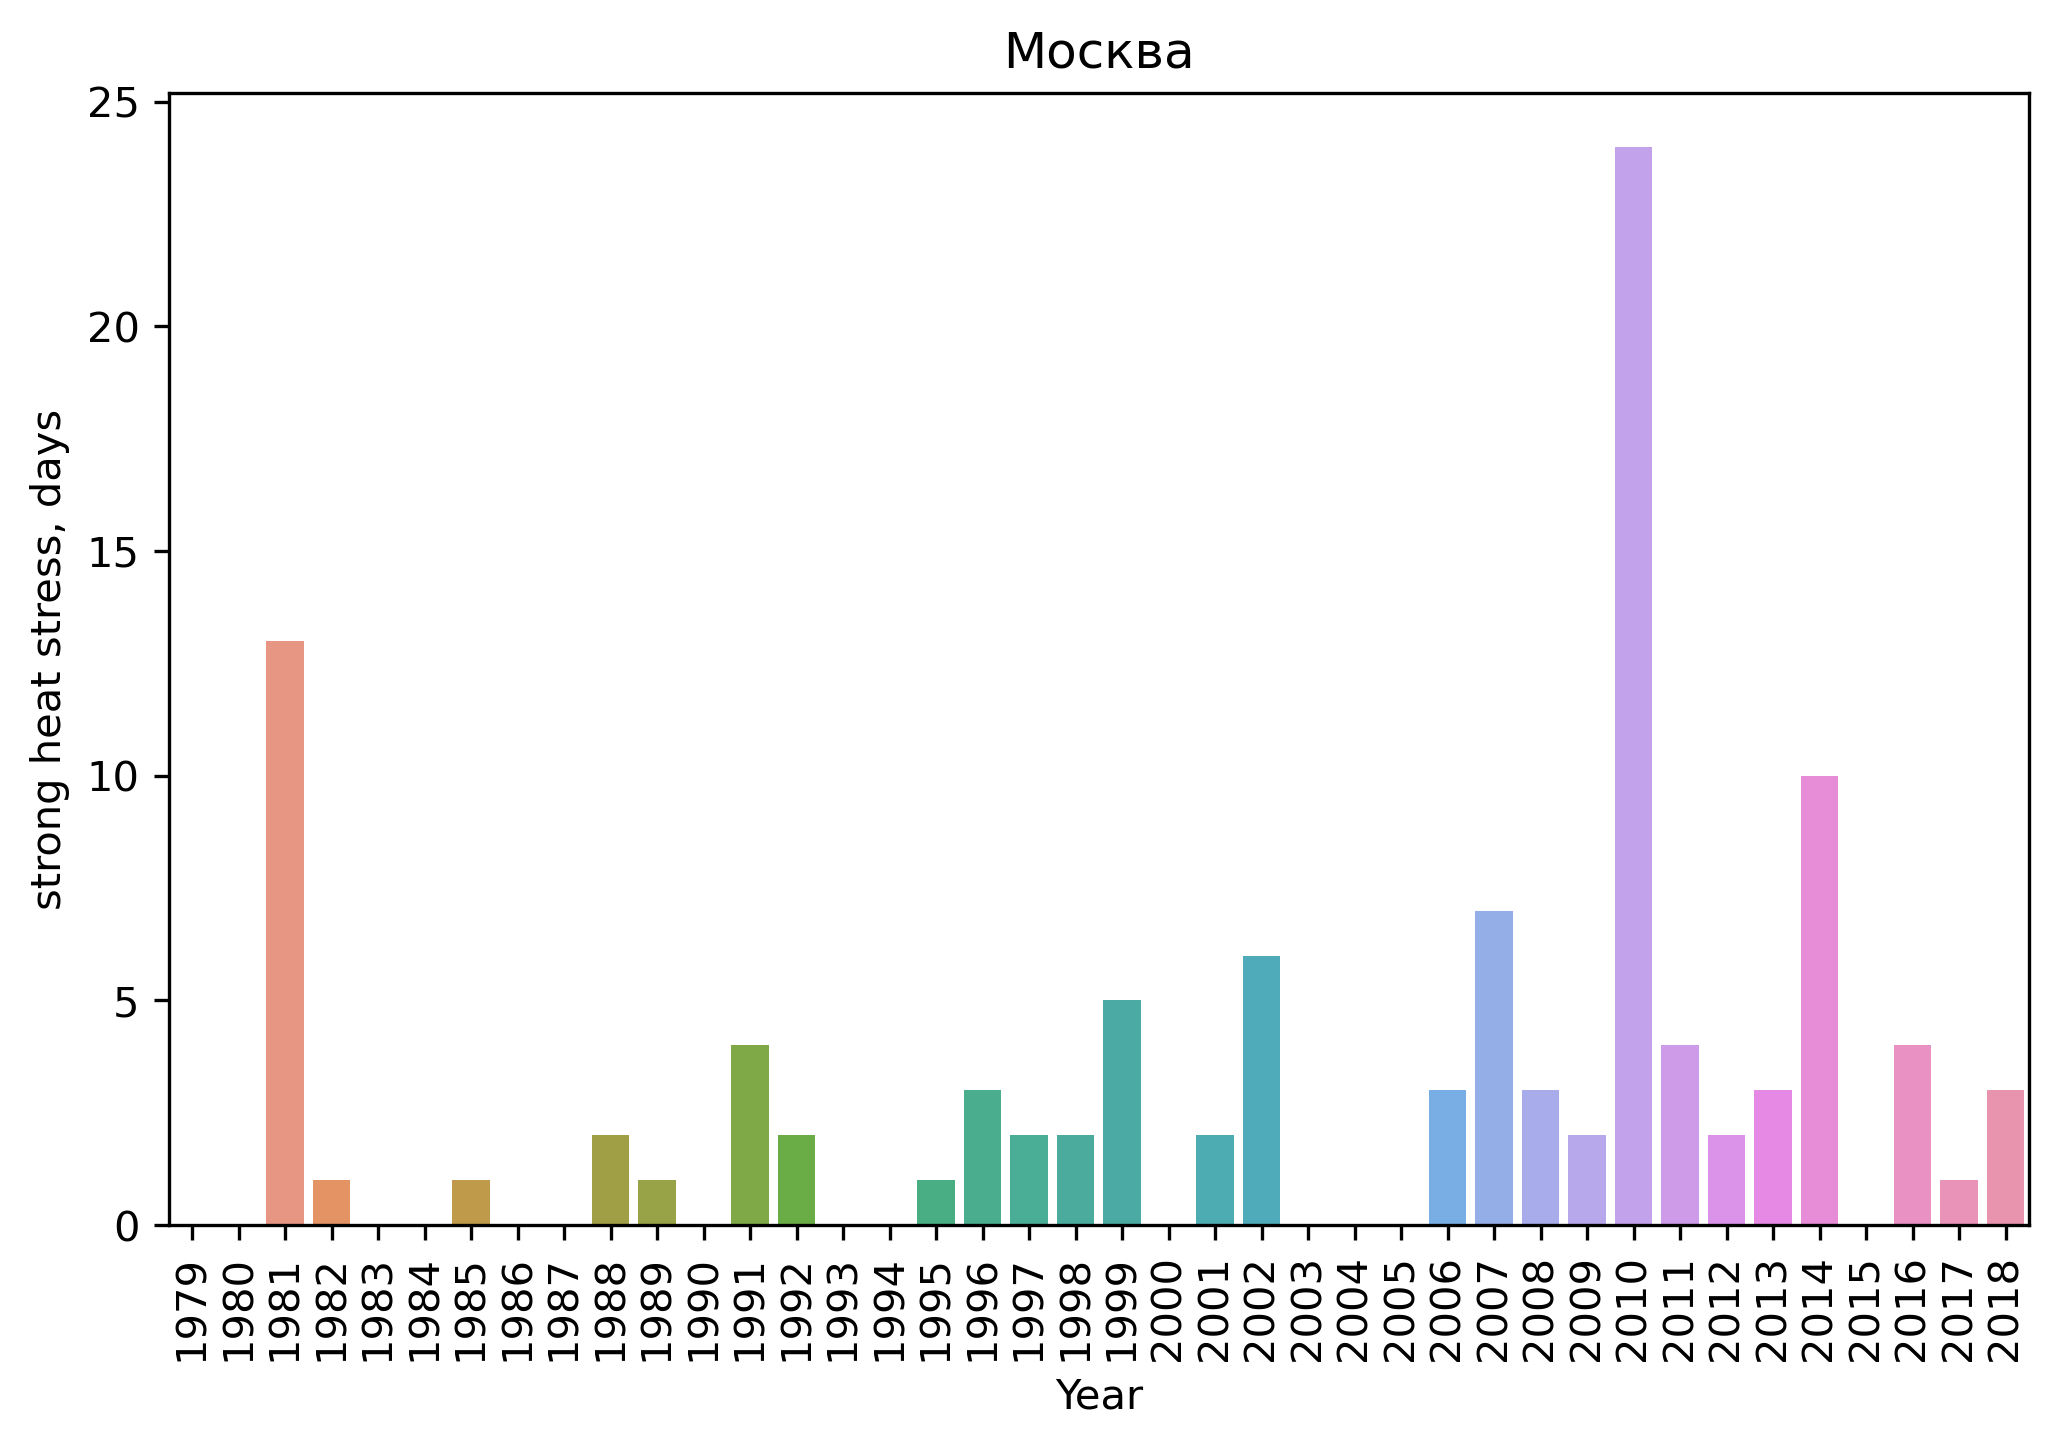

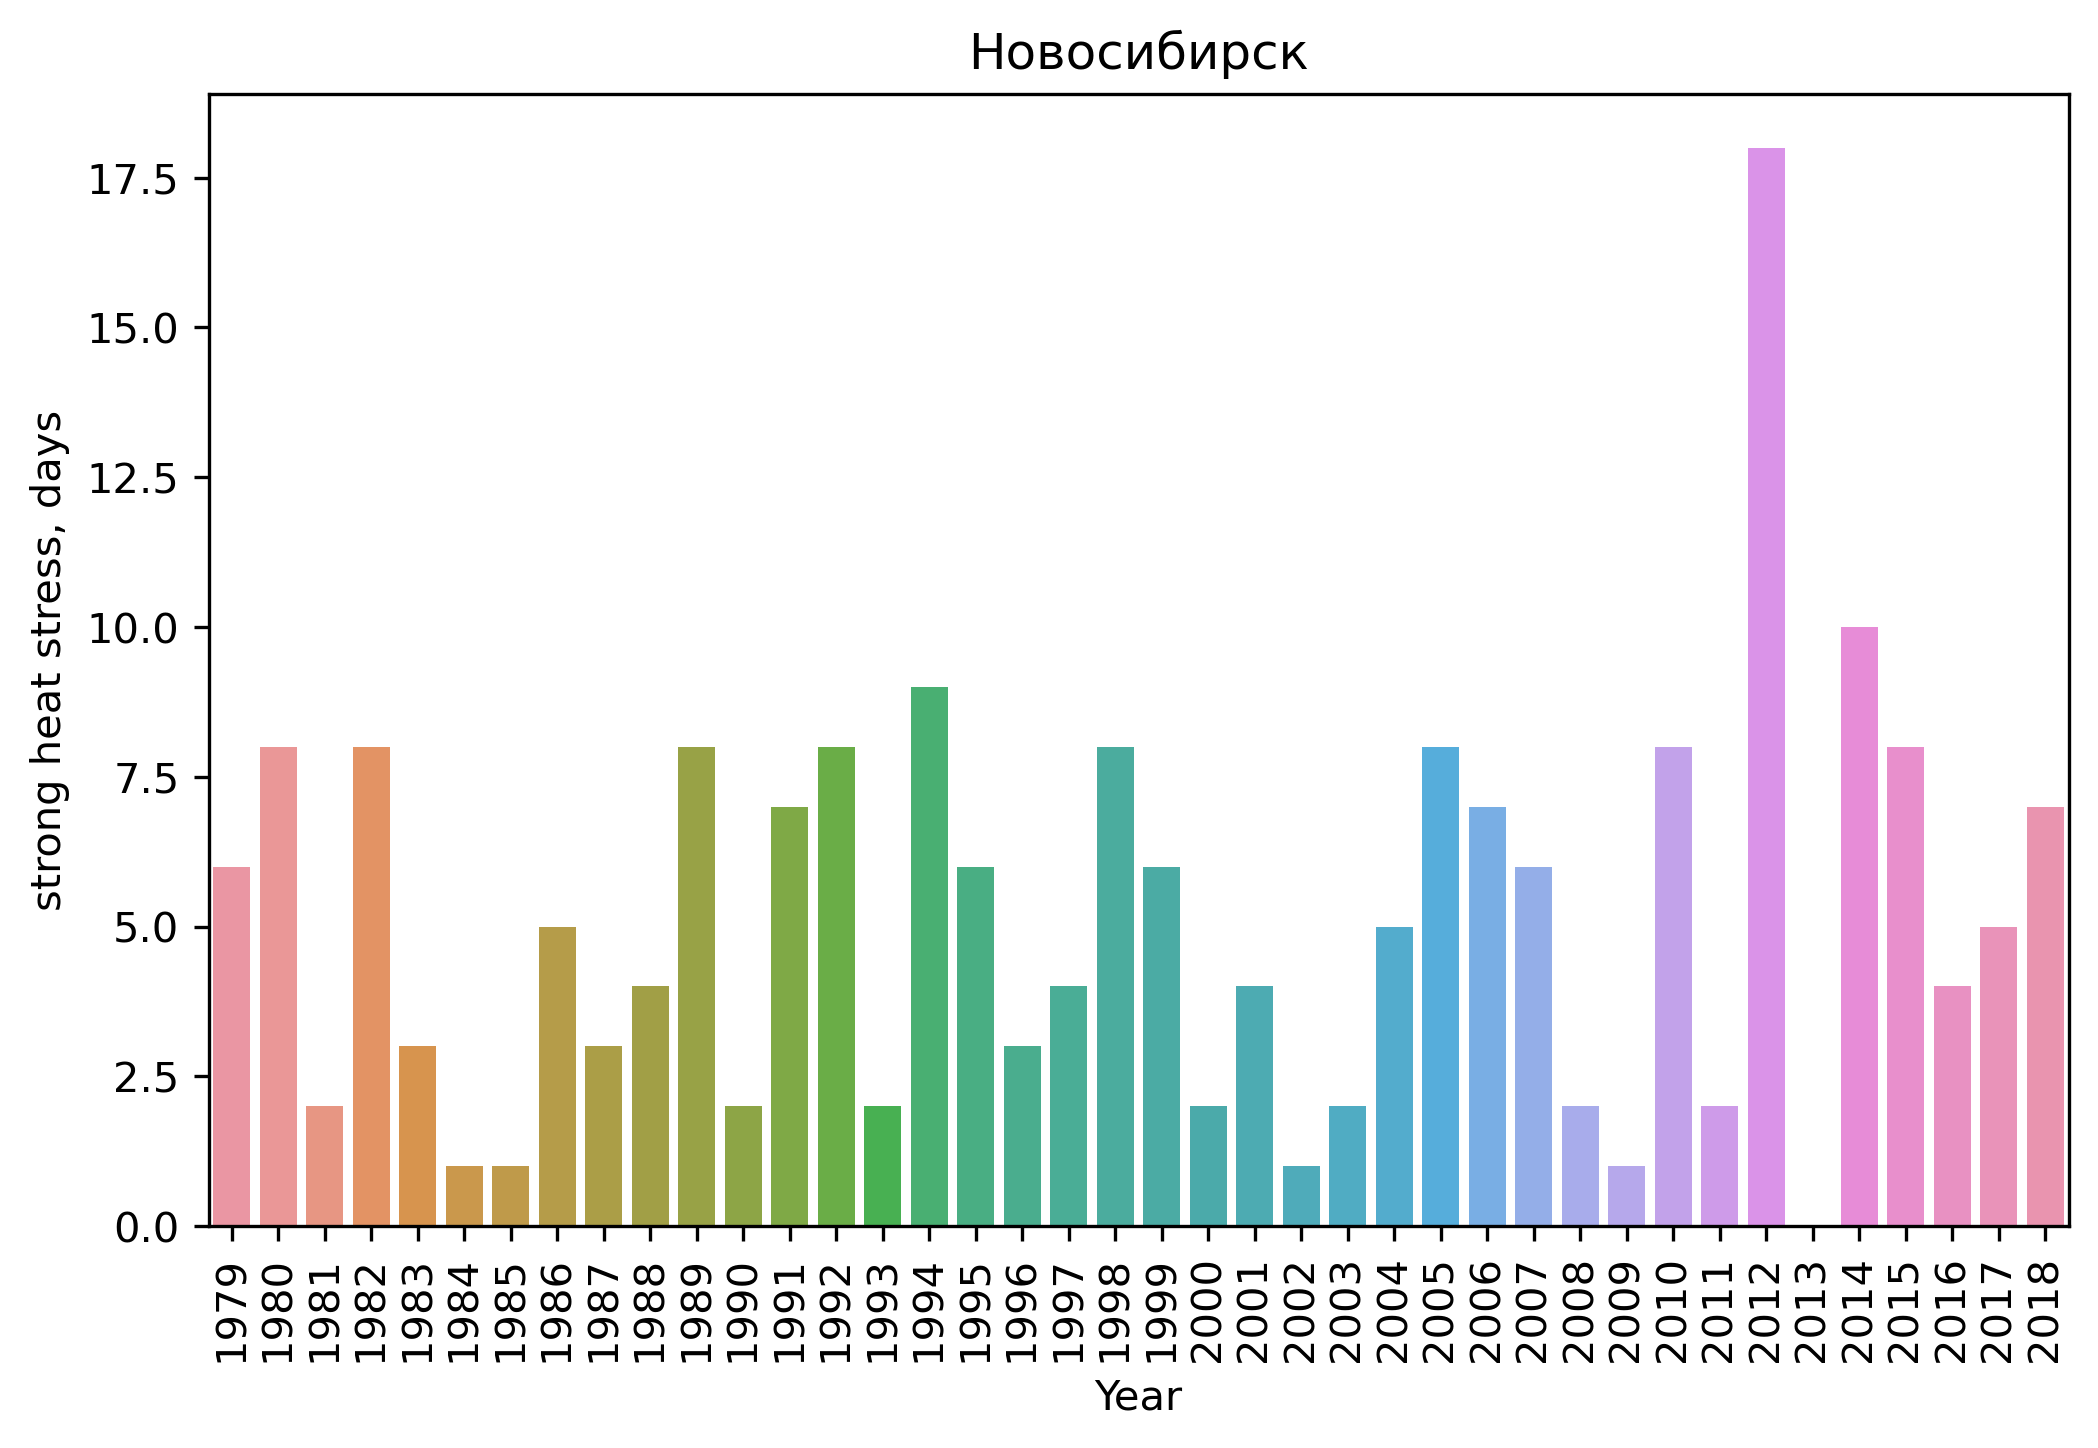

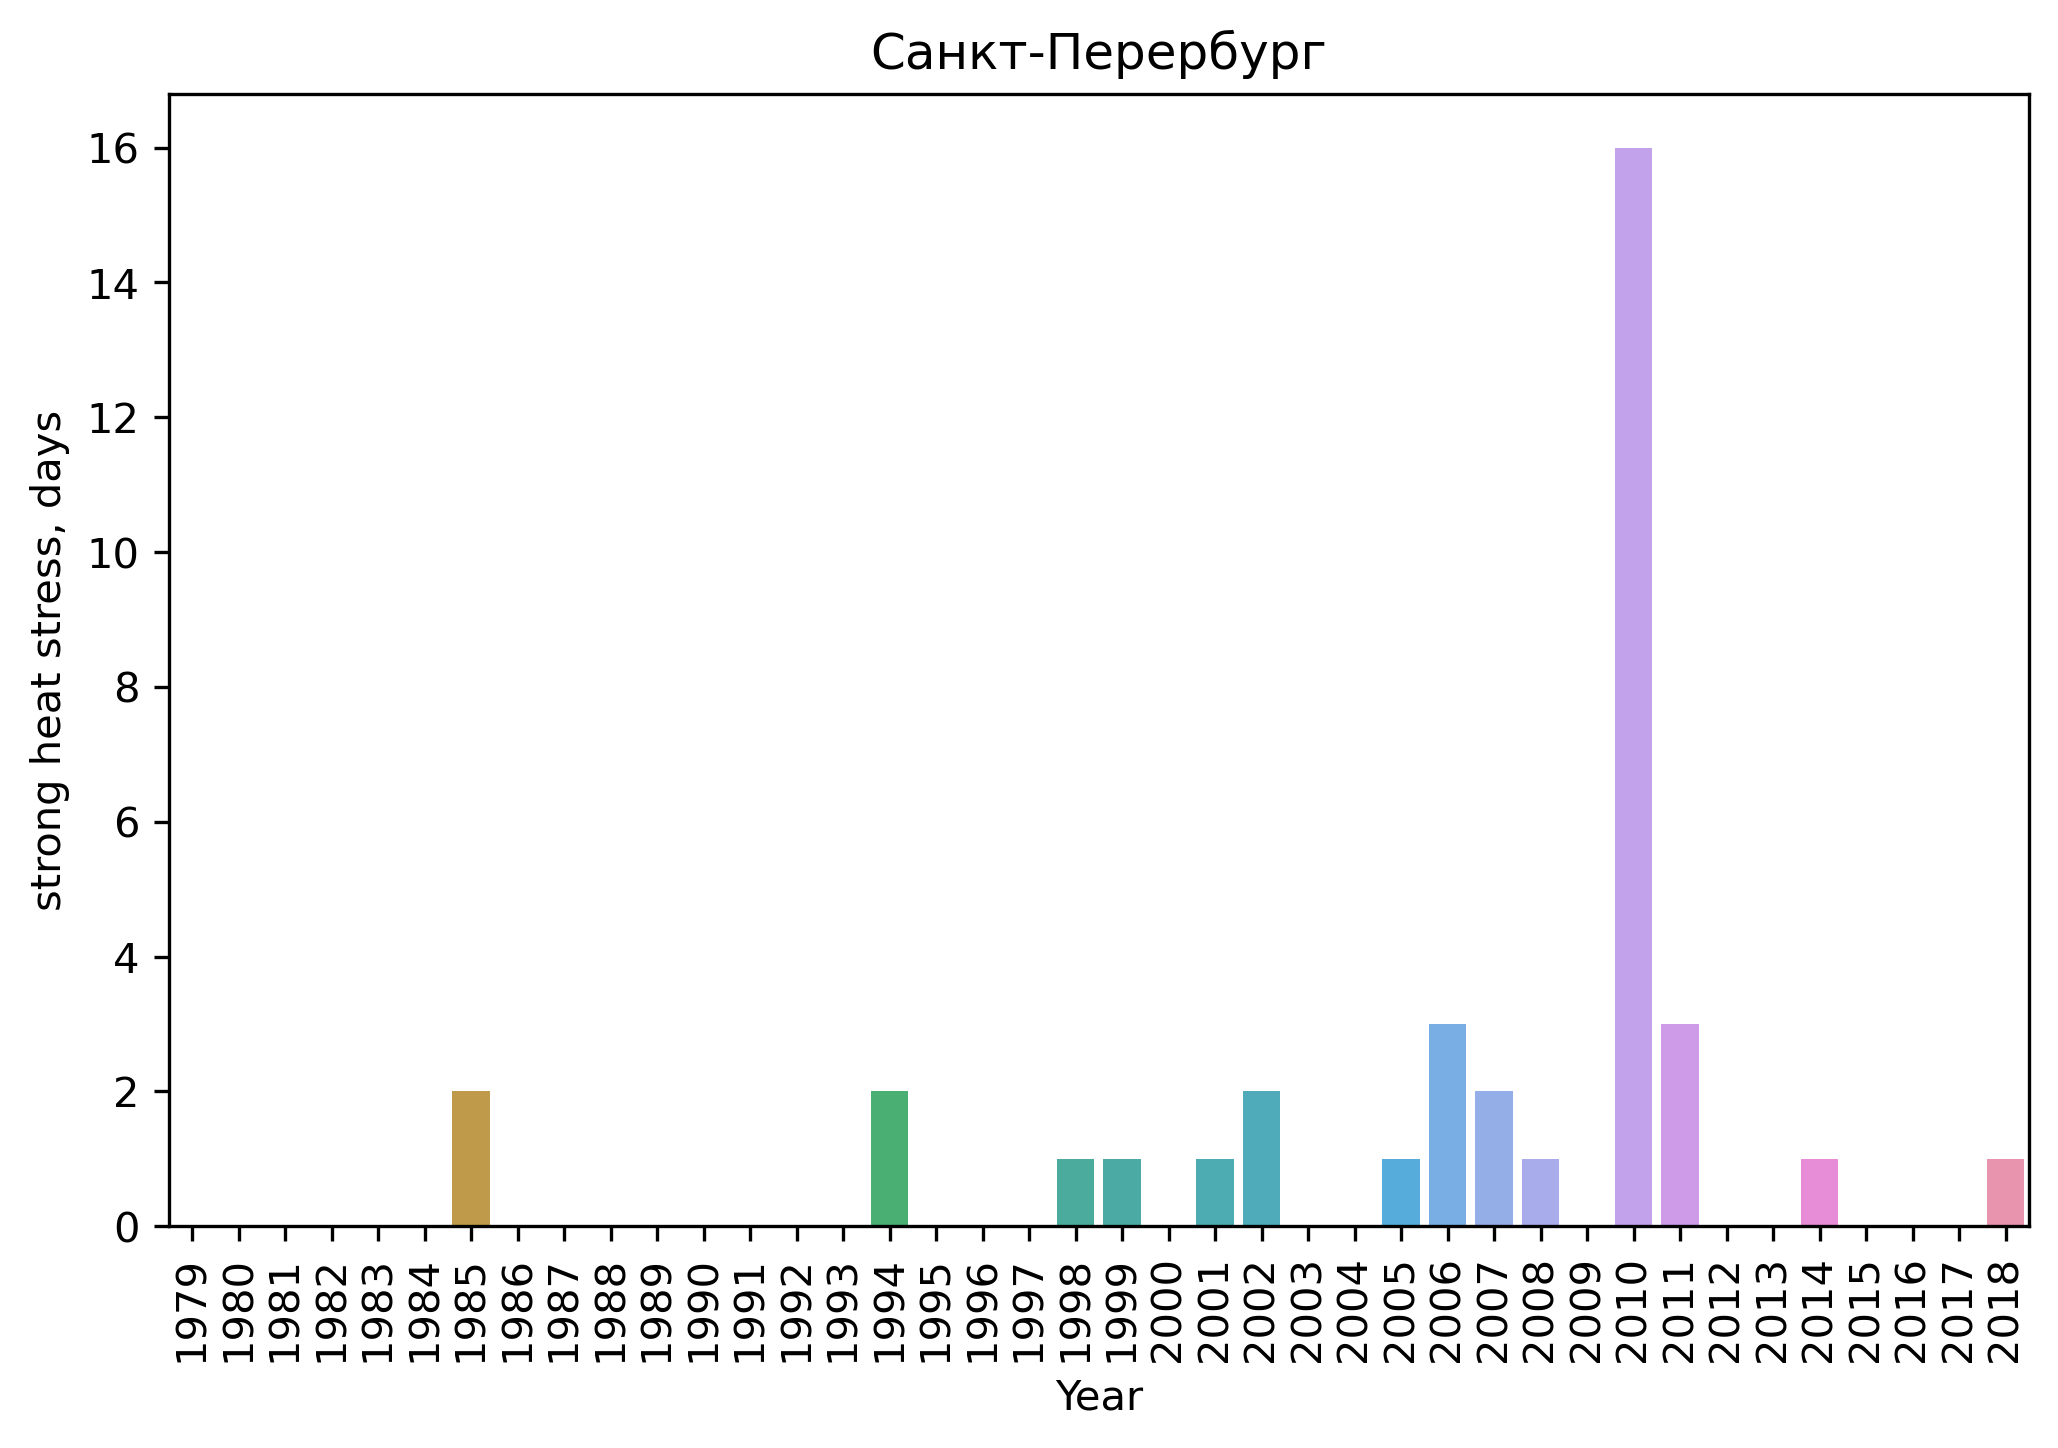

In [9]:
for city in all_cities_by_year['City'].unique():
    plot_heatwave_data(all_cities_by_year, city, stress_type="strong heat stress")

> В данных по Москве и Санкт-Петербурку видно аномально жаркий 2010 год

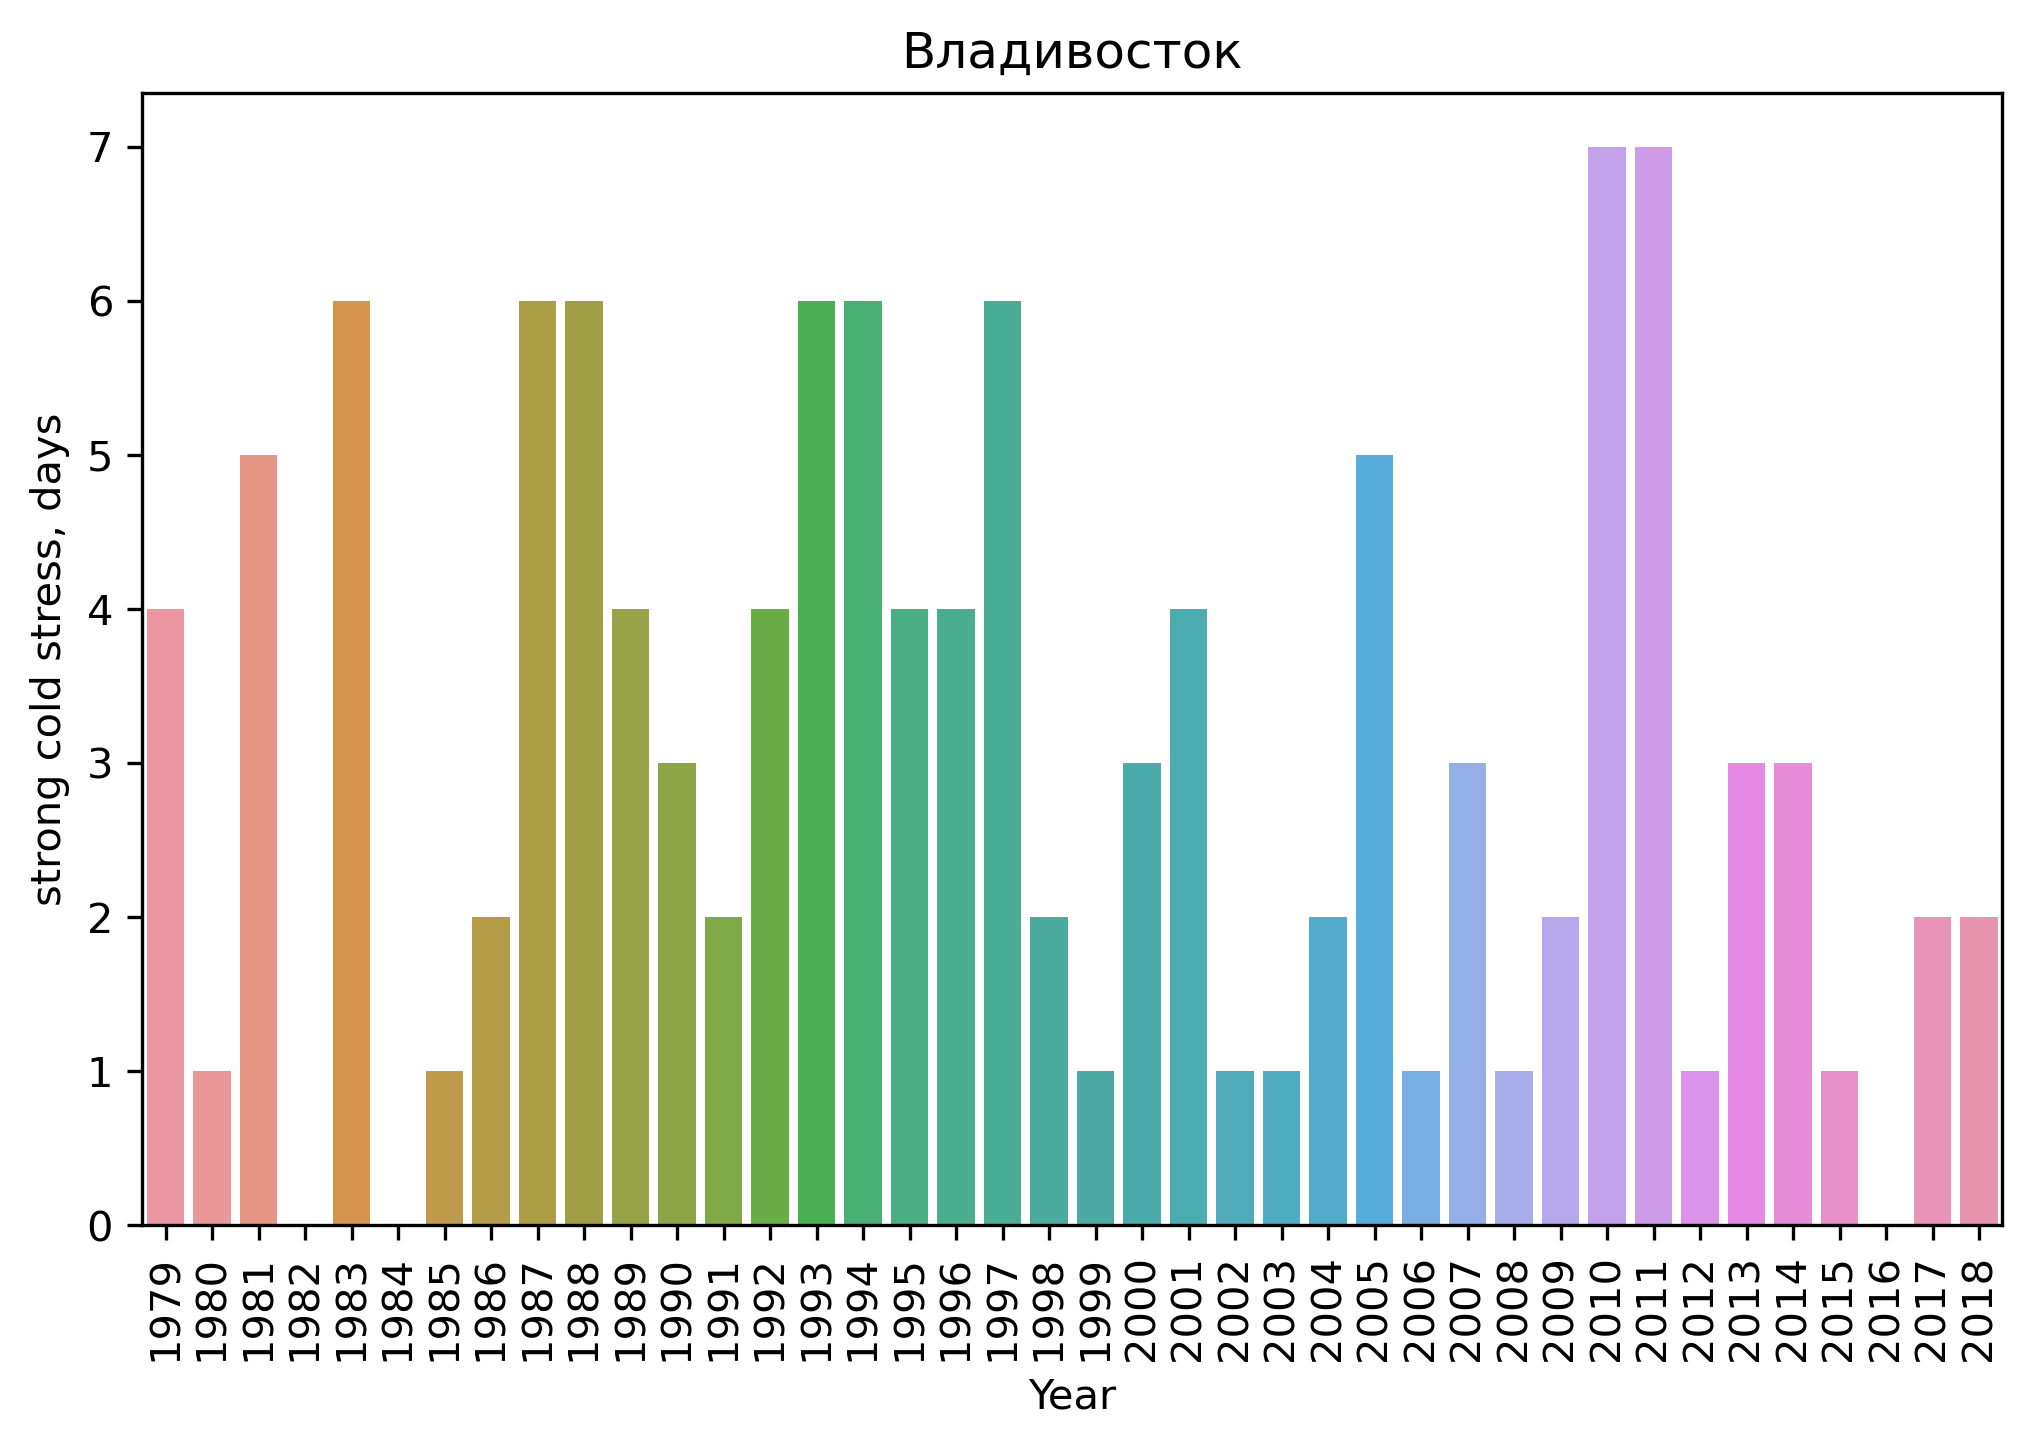

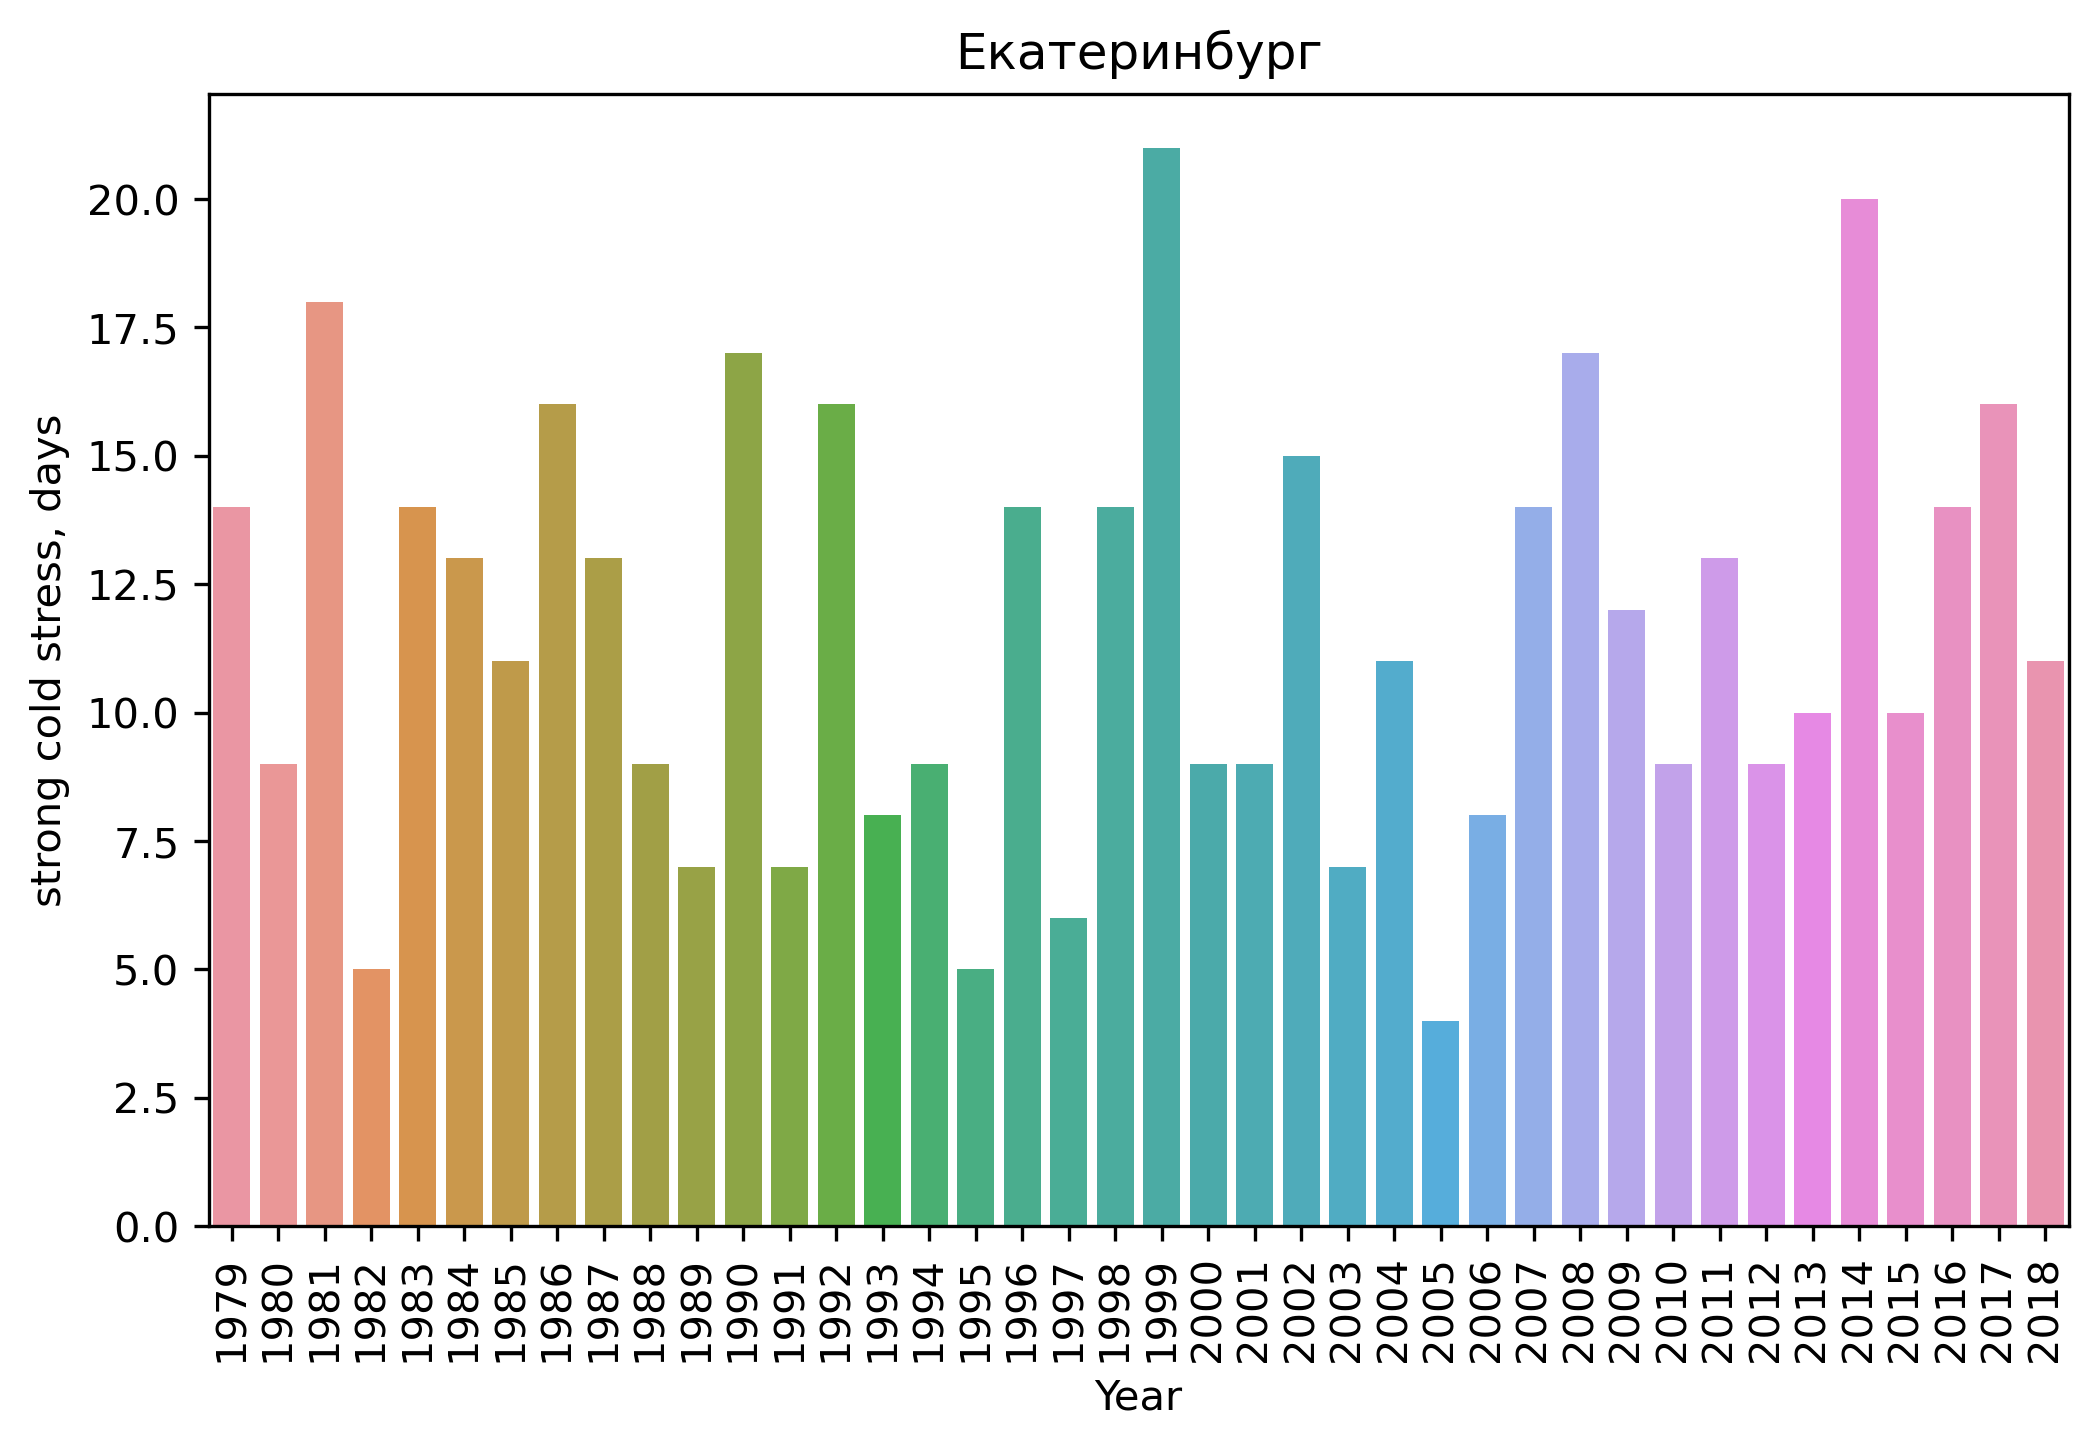

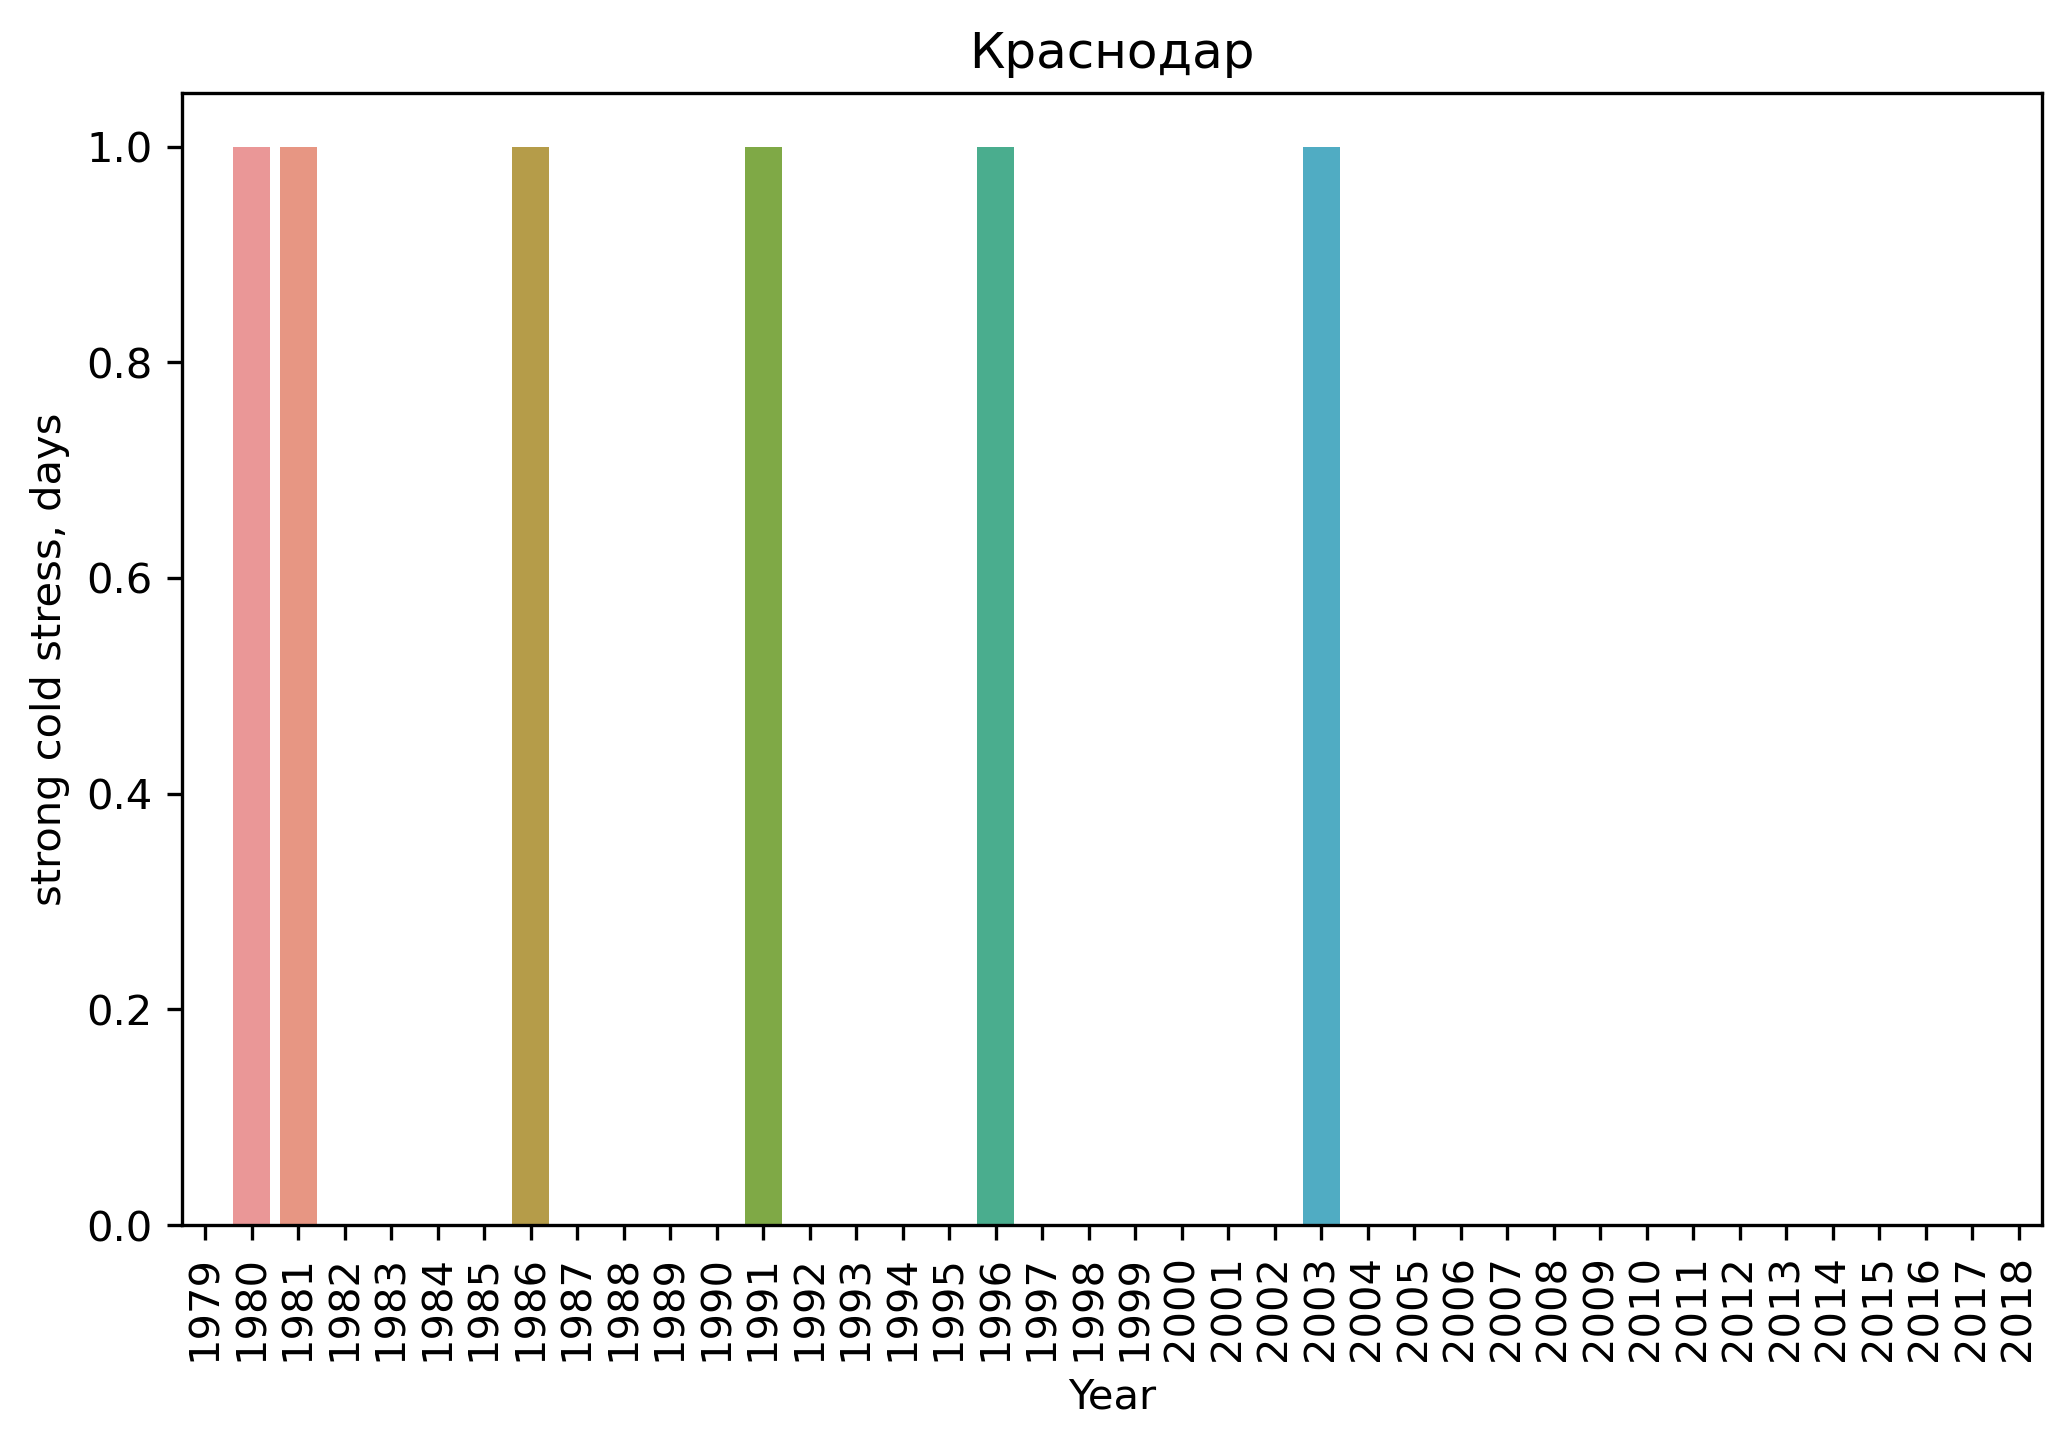

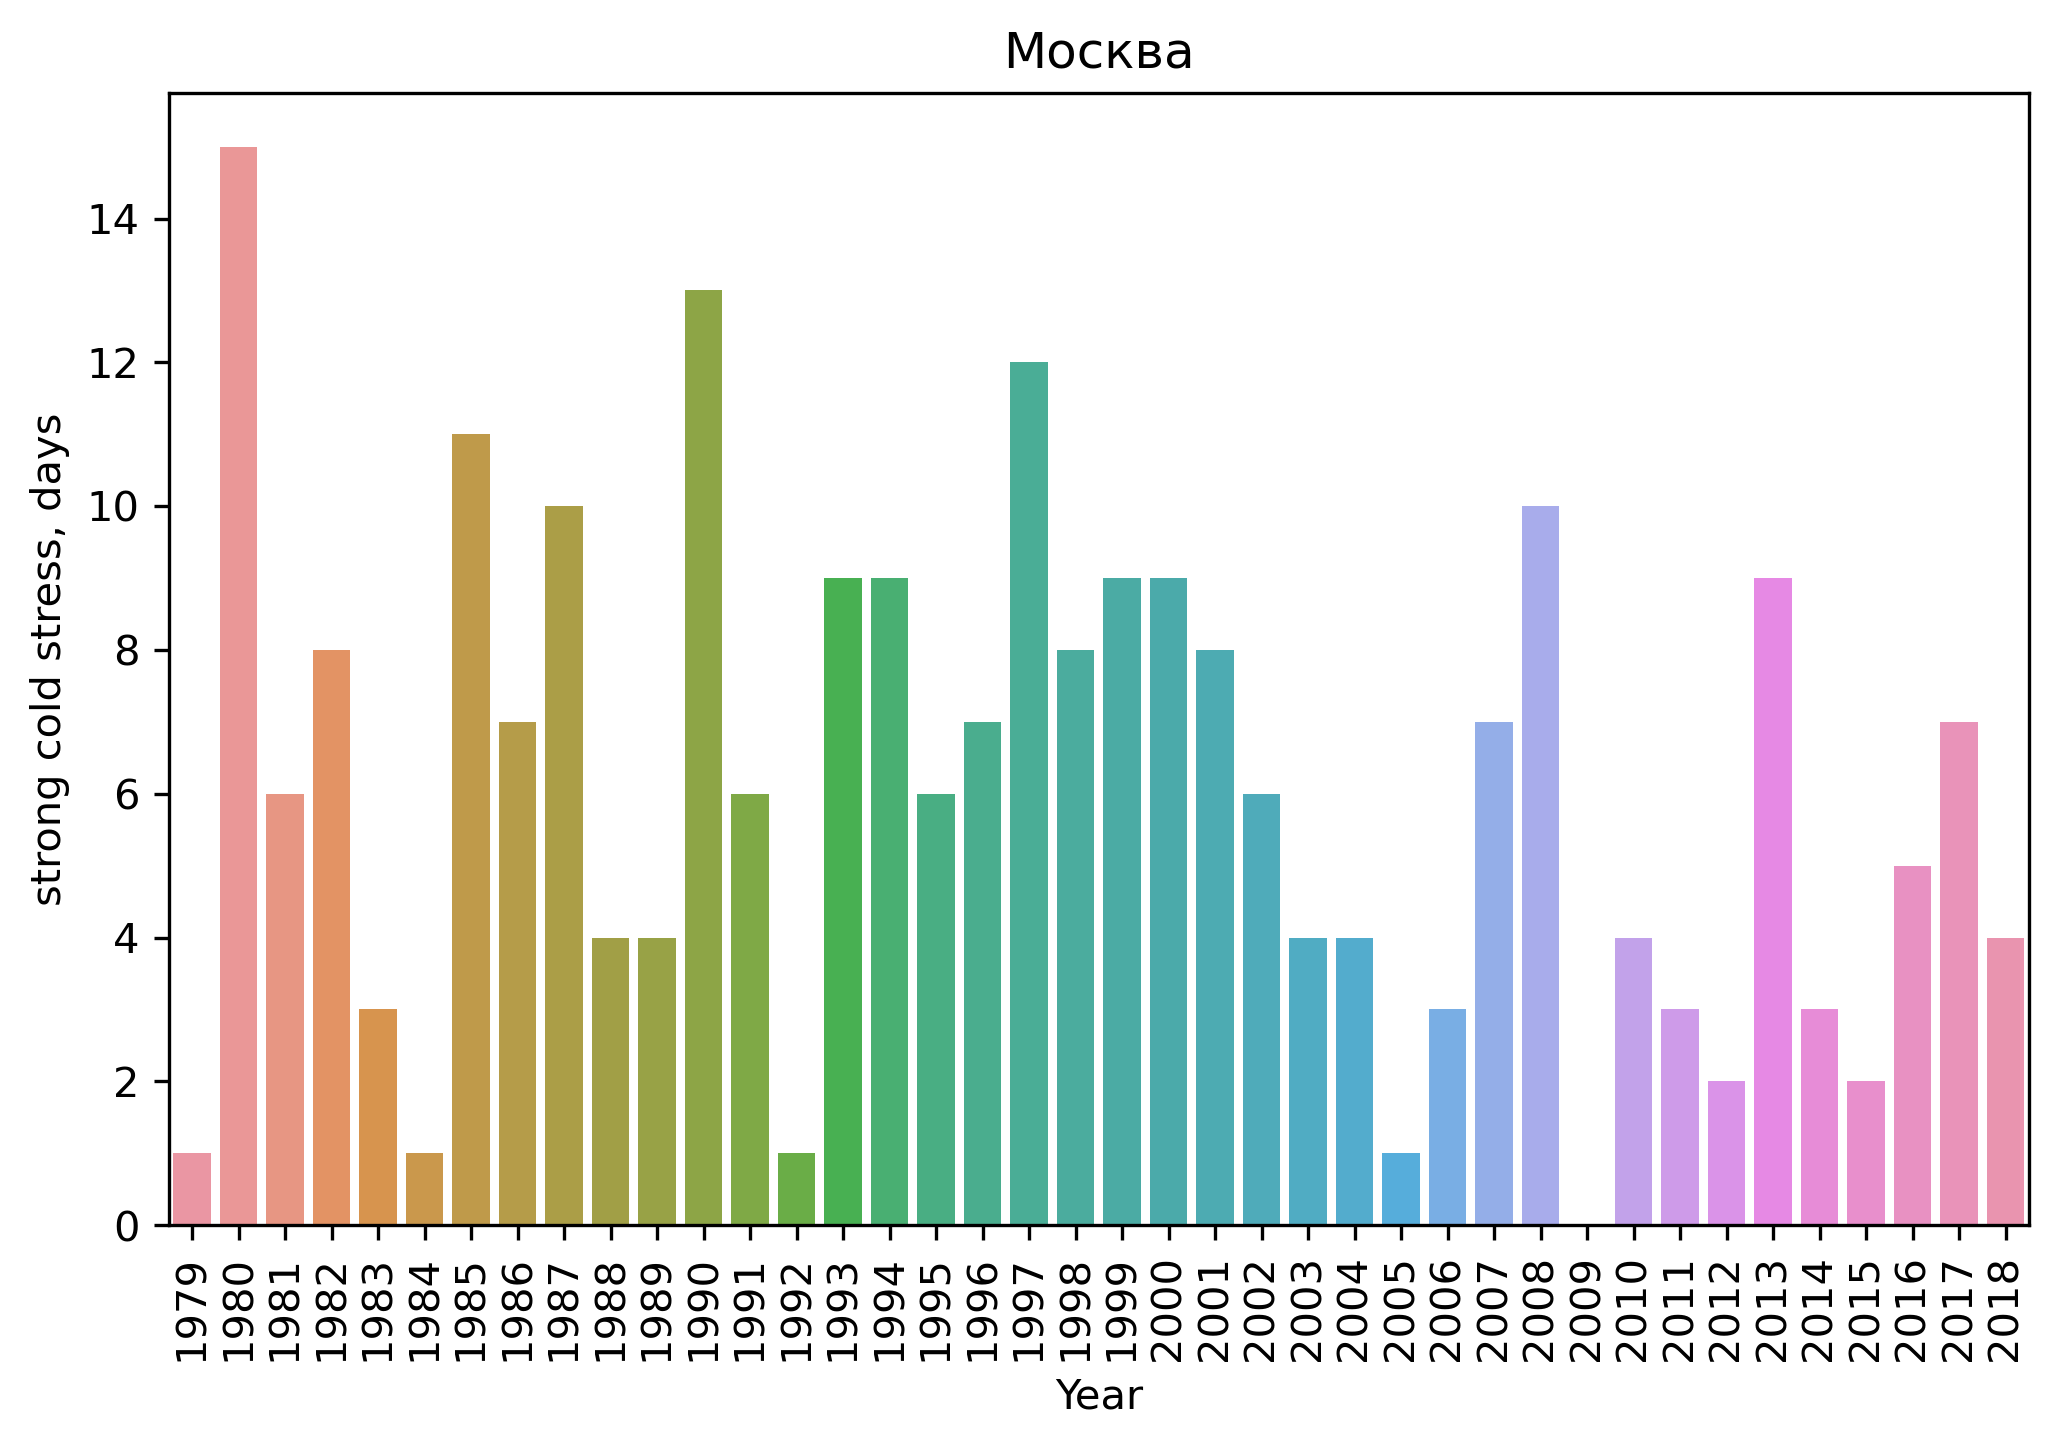

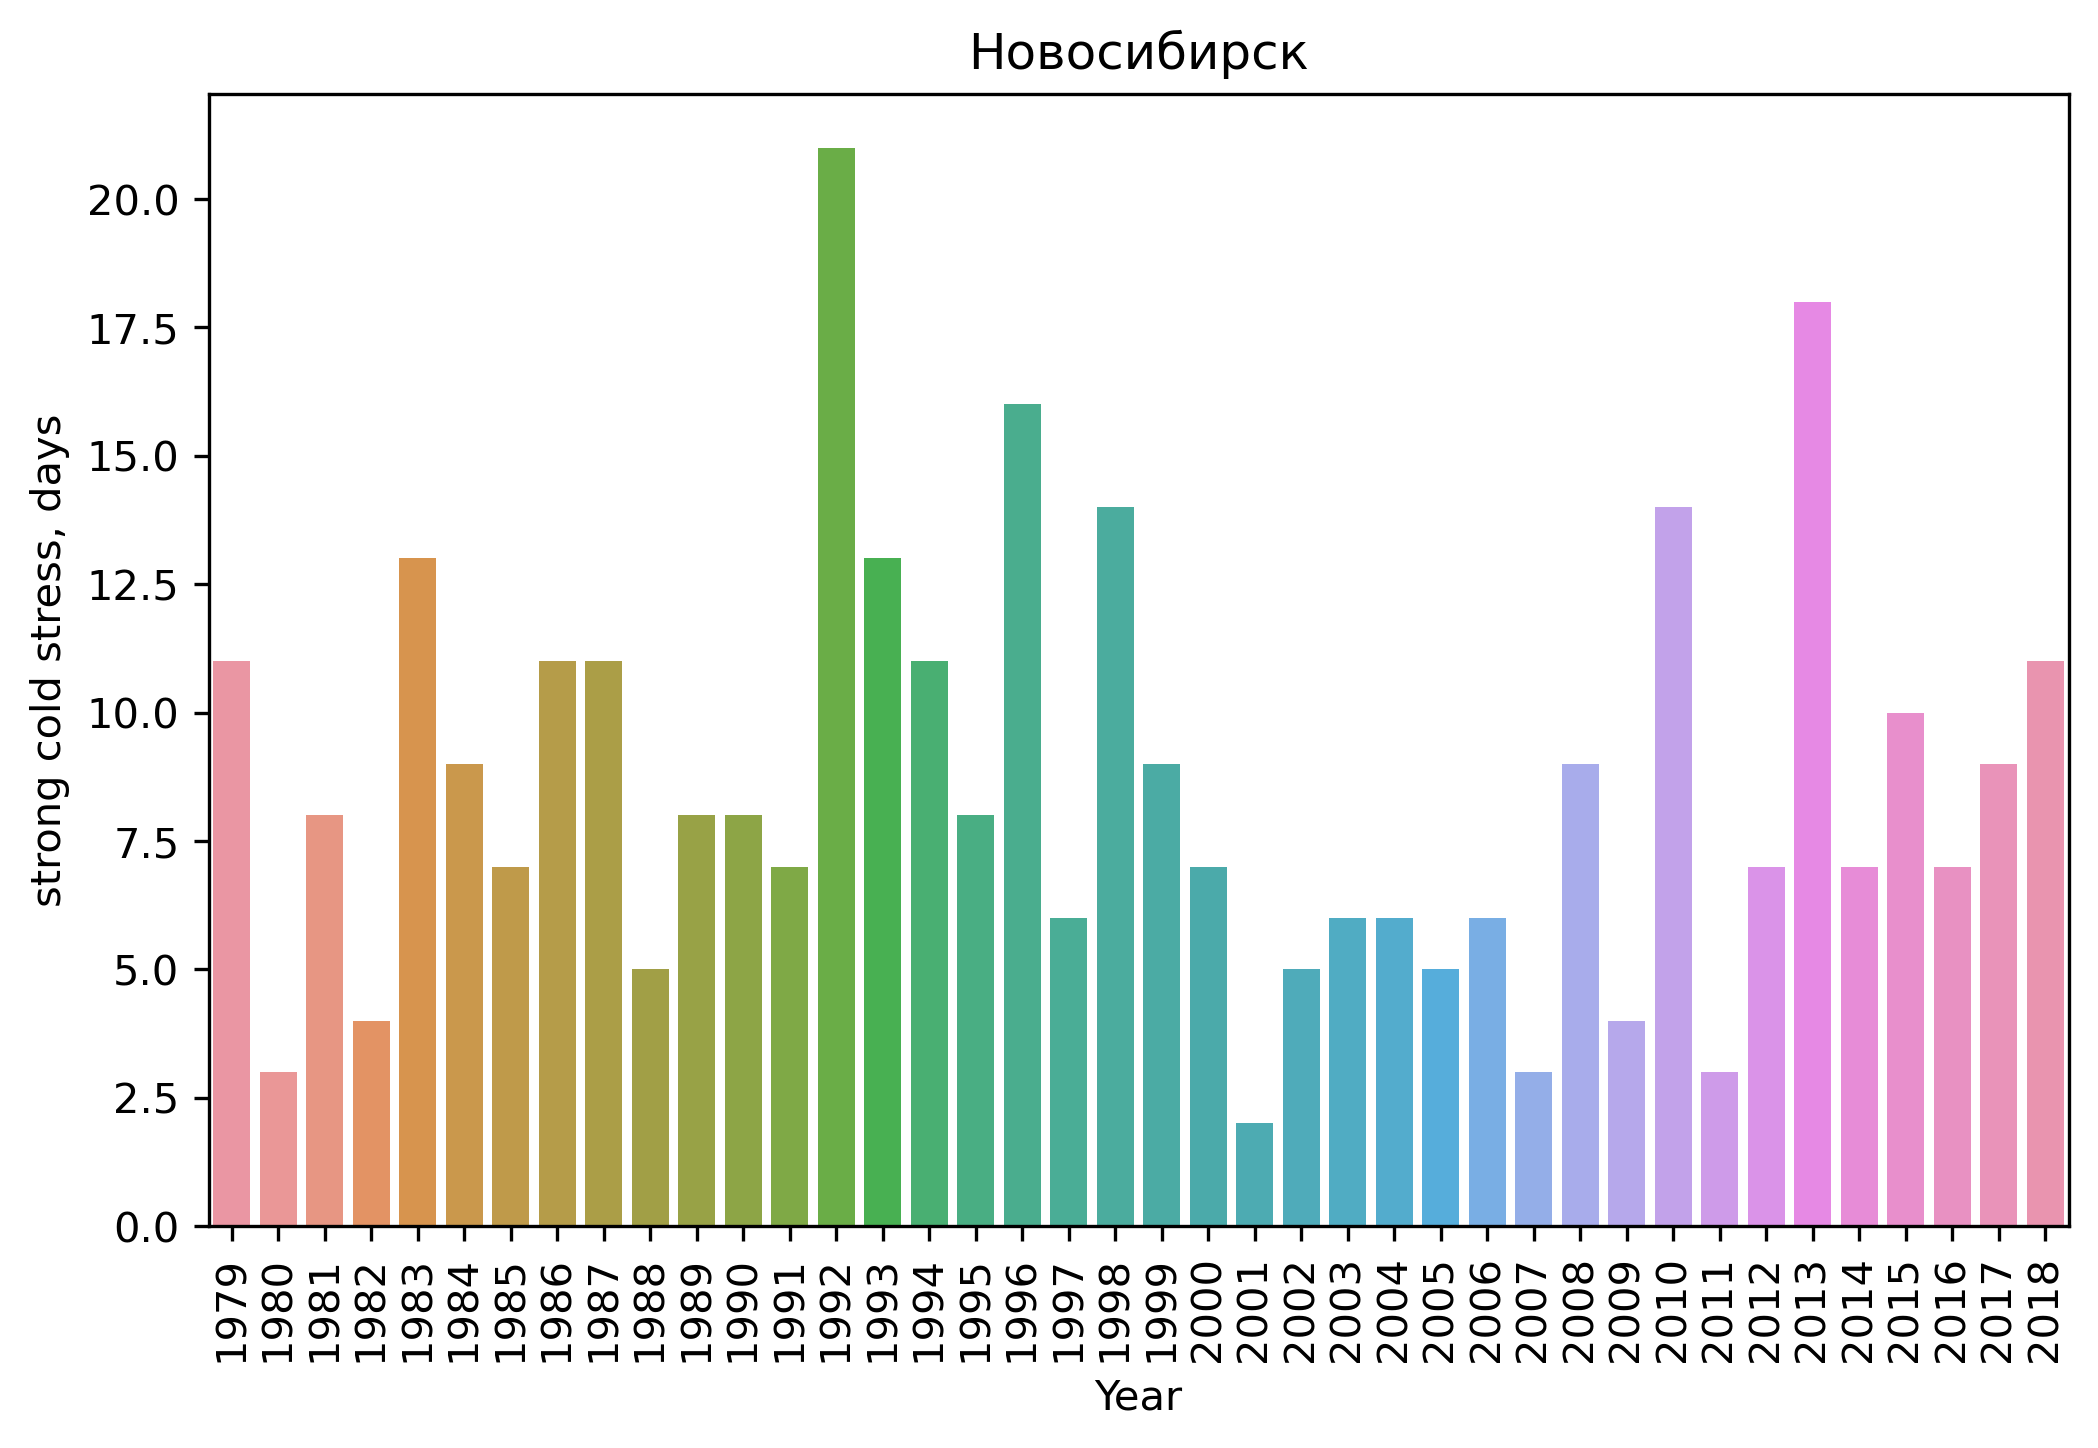

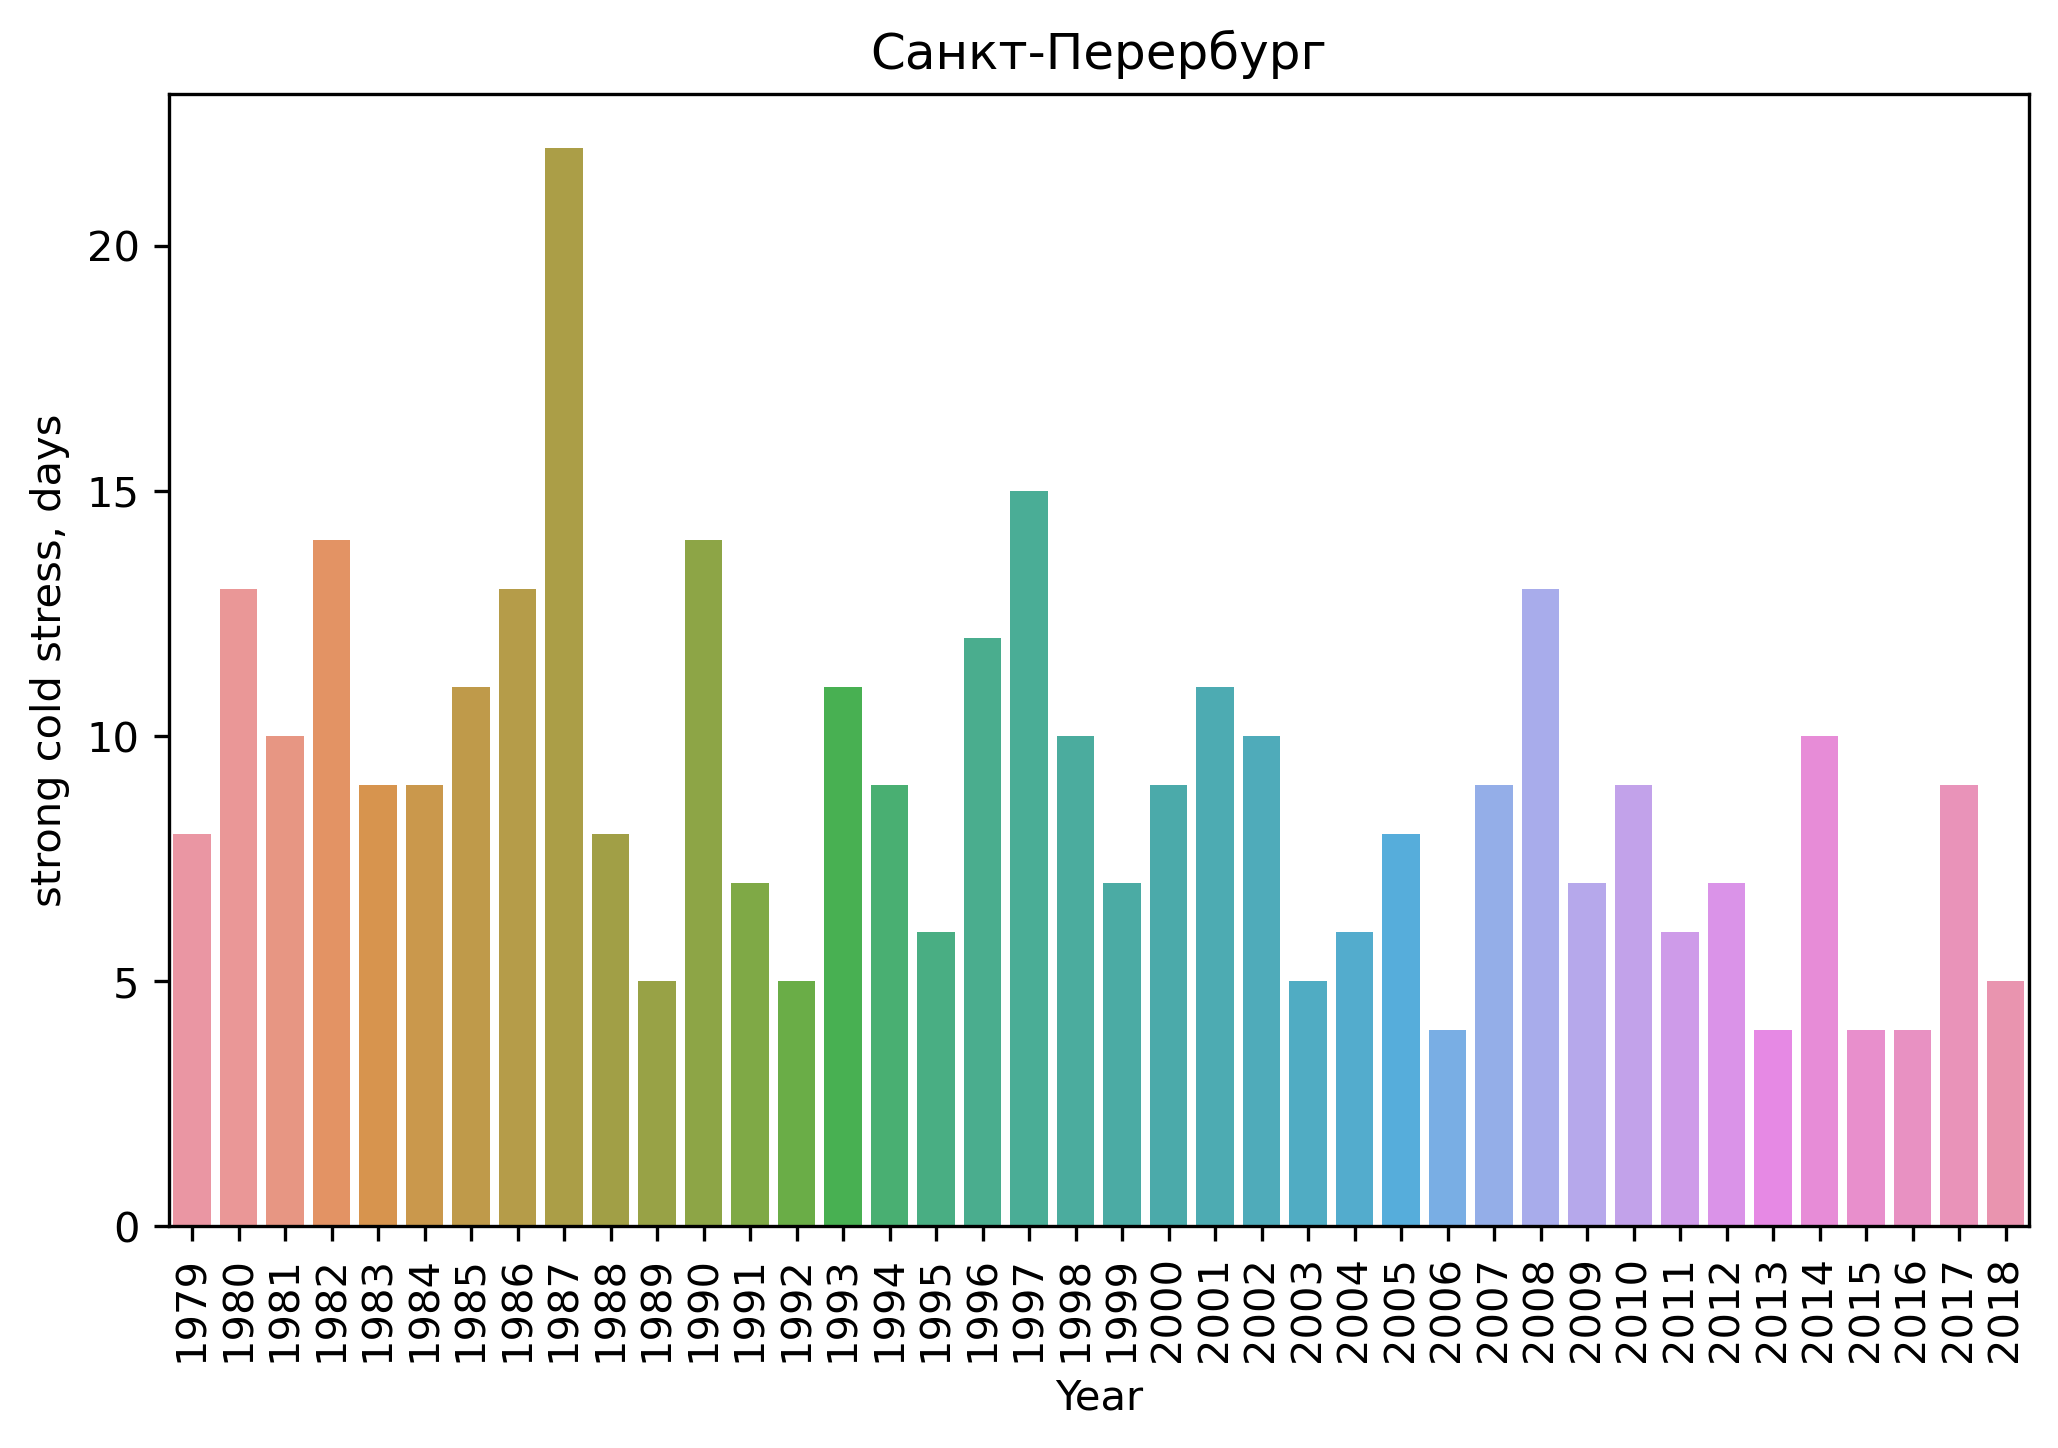

In [10]:
for city in all_cities_by_year['City'].unique():
    plot_heatwave_data(all_cities_by_year, city, stress_type="strong cold stress")

> После 2003 года в Краснодаре не зарегистировано ни одного дня с сильным холодовым стрессом

> По Москве и Питеру можно проверить гипотезу об убывающем тренде